# Lecture 7 - Time Series Econometric Model (Part-2) 
  
<br>11/29/2023

---
<font color='green'> ECON5360</font>  
<font color='green'> Department of Economics</font>

* Time series with a date as the index, the index of TS data is date type such as pd.datetime()

# univariate TS data

### What is Time Series Analysis/Modeling?
* A time series is a sequence of observations in chronological order    
For example:  
    * daily rate of the 10-year treasury note;   
    * change in the daily rate of the 10-year treasury note  
* Broad applications e.g. in economics, finance, neuroscience, signal processing...

* Time is the most critical factor that decides whether a business will rise or fall. 

* That’s why we see sales in stores and e-commerce platforms aligning with festivals. 

* These businesses analyze years of spending data to understand the best time to throw open the gates and see an increase in consumer spending.

<center><img src="Inputs/Stock_Price.PNG" width="1000" height="800" /></center>

## Important Concepts in Time Series Modeling: 

### 1. Stationary

* Many economic and financial time series exhibit trending behavior or non-stationarity in the mean and variances. 
* Leading examples are bank book balances/account numbers, customer bases, and the levels of macroeconomic aggregates like [real GDP](https://data.worldbank.org/indicator/ny.gdp.mktp.cd) and stock asset prices. 
* An important econometric task is determining the most appropriate form of the trend in the data. 
* For example, in modeling the data must be transformed to stationary form prior to analysis. If the data are trending, then it should be first formally tested and later some form of trend removal is required. 




### Stationary Time Series: 
* A process is stationary if its mean, variance, and covariance are unchanged over time.  
* The process $Y_1, Y_2, Y_3$, . . . is a stationary process if:  
    * $E(Y_i) = \mu$ (a constant) for all $i$  
    * $Var(Y_i) = \sigma^2$ (a constant) for all $i$  
    * $Corr(Y_i, Y_j) = \rho(|i-j|)$ and correlation depends only on the lag $|i-j|$  

* Stationary processes are mean-reverting which means an economic and financial metric tends to return to the original mean level despite long-term variations 

#### Classic non-stationary time series, e.g. the passenages volumn of airlines  

<center><img src="Inputs/Non_Stationary.PNG" width="800" height="800" /></center>

It is characterized as 
1) Upward Trend
2) Seasonal variation
3) Increasing size of seasonal oscillations

### How to test the stationarity by statistical methods?

#### Augmented Dickey- Fuller (ADF) test for Stationarity
Said and Dickey (1984) augment the basic autoregressive unit root test to accommodate general `ARMA` (p, q) models with unknown orders and their test is referred to as the Augmented Dickey- Fuller (ADF) test. The ADF test tests the null hypothesis that a time series $y_t$ is I(1) against the alternative that it is I(0) (Stationary). The ADF test is based on estimating the test regression: 


$$ y_t = \beta D_t + \phi y_{t-1} + \sum \eta \Delta y_{t-j} + \epsilon_t$$

$$ ADF_t = \frac{\phi - 1}{se(\phi)} $$

where $D_t$ is a vector of deterministic terms (constant, trend etc.). The error term is also assumed to be homoskedastic which means the variance of the residual is a constant. The specification of the deterministic terms depends on the assumed behavior of $y_t$ under the alternative hypothesis of trend stationarity as described in the previous section. **Under the null hypothesis, $y_t$ is NOT-Stationary**, often labeled as I(1) which implies that $\phi$ = 1. The ADF t-statistic and normalized bias statistic are based on the least squares estimates of equation (1). 

**Take home message: a time series is stationary if we reject the null hypothesis at significance level of 0.05 (p < 0.05)**  
([Hypothesis testing Definition](https://www.statisticssolutions.com/hypothesis-testing/))

# Let us play with Veteran Affairs (VA) Loan data

In [1]:
# pip install scikit-learn
import sklearn
sklearn.__version__

'1.3.2'

In [234]:
# upgrade it to 1.3.2
!pip install scikit-learn -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 22.7 MB/s eta 0:00:00m eta 0:00:01:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [2]:
#restart kernel and run 
import sklearn
sklearn.__version__

'1.3.2'

In [3]:
import os, sys, pickle
import numpy as np
import pandas as pd
from datetime import date
import statsmodels.api as sm
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1. data exploration

### Data Source: 

[VA Loan Origination data](https://www.benefits.va.gov/HOMELOANS/Lender_Statistics.asp)  
 
<a href="https://www.federalreserve.gov/publications/2019-february-supervisory-scenarios.htm">FedBOD Macro Economic Factor data </a>  (<a href="https://www.federalreserve.gov/supervisionreg/ccar-2019.htm">Excels</a>)

<a href="https://www.economy.com/home/products/data-buffet/tour/index.html">Moody's Macro Economic Factor DataBuffet (N/A)</a>
 



In [2]:
# Read VA data
VA_df_raw=pd.read_excel('./Inputs/VA Historical Data.xlsx', sheet_name = 'VA admin Data')
VA_df_raw.rename(columns={'# Loans':'Loans'}, inplace=True)

In [3]:
print(VA_df_raw.shape)
VA_df_raw.tail()

(539, 10)


FISCAL_YEAR  GROUP_CD  STAT_CD                   STATUS        F_QTR  \
534         2018         2        3          No Down Payment  1st Quarter   
535         2018         2        4             Down Payment  1st Quarter   
536         2018         3        5           Purchase Loans  1st Quarter   
537         2018         3        6  Interest Rate Reduction  1st Quarter   
538         2018         3        7    Cash Out (and others)  1st Quarter   

     Loans  TOTAL_LOAN_AMOUNT  AVG_LOAN_AMOUNT  TOTAL_GUARANTY_AMOUNT  \
534  73938        18053161861           244166           4.566308e+09   
535  19068         6478398780           339752           1.471110e+09   
536  93006        24531560641           263763           6.037418e+09   
537  31328         7873060601           251310           2.009085e+09   
538  44839        11514963546           256806           2.843672e+09   

     AVG_GUARANTY_AMOUNT  
534                61758  
535                77150  
536                64914  
537                64130  
538                63419

In [4]:
VA_df_raw.describe()

FISCAL_YEAR    GROUP_CD     STAT_CD          Loans  TOTAL_LOAN_AMOUNT  \
count   539.000000  539.000000  539.000000     539.000000       5.390000e+02   
mean   2008.129870    2.142857    4.000000   28920.519481       5.783523e+09   
std       5.563241    0.833767    2.001858   22559.055044       5.280322e+09   
min    1999.000000    1.000000    1.000000     726.000000       7.772471e+07   
25%    2003.000000    1.000000    2.000000   11710.500000       2.210923e+09   
50%    2008.000000    2.000000    4.000000   24851.000000       4.620935e+09   
75%    2013.000000    3.000000    6.000000   41606.000000       7.767874e+09   
max    2018.000000    3.000000    7.000000  108970.000000       2.880402e+10   

       AVG_LOAN_AMOUNT  TOTAL_GUARANTY_AMOUNT  AVG_GUARANTY_AMOUNT  
count       539.000000           5.390000e+02           539.000000  
mean     191114.512059           1.503119e+09         49551.823748  
std       55125.217719           1.323982e+09         11518.723155  
min       96828.000000           2.353776e+07         31231.000000  
25%      139376.000000           5.844657e+08         38239.500000  
50%      195054.000000           1.223920e+09         50748.000000  
75%      230110.000000           2.000500e+09         58352.000000  
max      340544.000000           7.072926e+09         77446.000000

In [5]:
VA_df_raw.GROUP_CD.unique()

array([1, 2, 3])

In [6]:
VA_df_raw.STAT_CD.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [7]:
VA_df_raw.STATUS.unique()

array(['First Time Home Buyer', 'Previous Home Buyer', 'No Down Payment',
       'Down Payment', 'Purchase Loans', 'Interest Rate Reduction',
       'Cash Out (and others)'], dtype=object)

In [8]:
VA_df_raw.groupby(['STATUS', 'GROUP_CD']).size()

STATUS                   GROUP_CD
Cash Out (and others)    3           77
Down Payment             2           77
First Time Home Buyer    1           77
Interest Rate Reduction  3           77
No Down Payment          2           77
Previous Home Buyer      1           77
Purchase Loans           3           77
dtype: int64

# We will use subset with STATUS == "Purchase Loans" as Time Series data  

In [9]:
VA_df = VA_df_raw[VA_df_raw.STATUS == "Purchase Loans"].iloc[:,[0,4,5]] #slice row by STATUS == "Purchase Loans" and column by index of 0, 4, and 5
VA_df.info()
print(f"\nThe length of data is {len(VA_df)}\n")
VA_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 16 to 536
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FISCAL_YEAR  77 non-null     int64 
 1   F_QTR        77 non-null     object
 2   Loans        77 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB

The length of data is 77



FISCAL_YEAR        F_QTR  Loans
16         1999  1st Quarter  56542
17         1999  2nd Quarter  63390
18         1999  3rd Quarter  62575
19         1999  4th Quarter  74827
44         2000  1st Quarter  54115

In [10]:
VA_df['Quarters']=VA_df['FISCAL_YEAR'].astype(str) +"Q"+ VA_df['F_QTR'].str[0] 
VA_df.Quarters[:5]

16    1999Q1
17    1999Q2
18    1999Q3
19    1999Q4
44    2000Q1
Name: Quarters, dtype: object

In [11]:
VA_df.Quarters.dtype

dtype('O')

# convert a date string to a datatime by `pd.to_datetime`

In [12]:
VA_df.index

Int64Index([ 16,  17,  18,  19,  44,  45,  46,  47,  72,  73,  74,  75, 100,
            101, 102, 103, 128, 129, 130, 131, 156, 157, 158, 159, 184, 185,
            186, 187, 212, 213, 214, 215, 240, 241, 242, 243, 268, 269, 270,
            271, 296, 297, 298, 299, 324, 325, 326, 327, 352, 353, 354, 355,
            380, 381, 382, 383, 408, 409, 410, 411, 436, 437, 438, 439, 464,
            465, 466, 467, 492, 493, 494, 495, 520, 521, 522, 523, 536],
           dtype='int64')

In [13]:
VA_df.index = pd.to_datetime(VA_df.Quarters) #create TS by quarter
VA_df.head()

FISCAL_YEAR        F_QTR  Loans Quarters
Quarters                                            
1999-01-01         1999  1st Quarter  56542   1999Q1
1999-04-01         1999  2nd Quarter  63390   1999Q2
1999-07-01         1999  3rd Quarter  62575   1999Q3
1999-10-01         1999  4th Quarter  74827   1999Q4
2000-01-01         2000  1st Quarter  54115   2000Q1

In [14]:
type(VA_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

For more about the time seriesindex, refer to:  
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [15]:
train_end = VA_df.index[-1]
train_end

Timestamp('2018-01-01 00:00:00')

<Axes: xlabel='Quarters'>

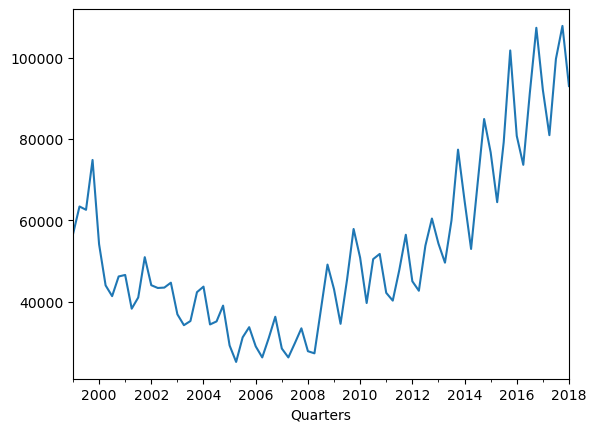

In [16]:
VA_df.Loans.plot()

# The frequency of decomposition must be an interval, which 'may' repeat. So we have data with 15min frequency and we are looking for a weekly repetition of behavior.

In [17]:
VA_df.Loans.values #quarterly data

array([ 56542,  63390,  62575,  74827,  54115,  43983,  41339,  46178,
        46549,  38255,  41012,  50927,  44030,  43347,  43445,  44648,
        36870,  34199,  35222,  42316,  43681,  34378,  35123,  39010,
        29213,  25164,  31204,  33709,  28994,  26271,  31042,  36271,
        28459,  26270,  29776,  33426,  27800,  27276,  38175,  49102,
        43035,  34537,  45457,  57860,  50797,  39651,  50446,  51719,
        42152,  40241,  47755,  56431,  44995,  42666,  53761,  60426,
        54265,  49573,  59983,  77365,  64837,  52944,  69009,  84894,
        76698,  64449,  79203, 101757,  80738,  73637,  91283, 107331,
        92047,  80925,  99671, 107791,  93006])

In [18]:
VA_df.shape

(77, 4)

In [19]:
VA_df.to_csv("VA_df.csv", index = False)

In [20]:
#pd.read_csv()

In [21]:
pickle.dump(VA_df, open("VA_df.pkl", "wb"))

In [4]:
VA_df = pickle.load(open("VA_df.pkl", "rb"))

In [23]:
VA_df.shape

(77, 4)

# parametric modeling method

In [24]:
import statsmodels
statsmodels.__version__

'0.14.0'

In [25]:
pip install statsmodels -U

Note: you may need to restart the kernel to use updated packages.


In [2]:
# restart the kernel
import statsmodels
statsmodels.__version__

'0.14.0'

# Seasonality: Additive (Left) vs Multiplicative (Right)
* The additive model is useful when the seasonal variation is relatively constant over time.

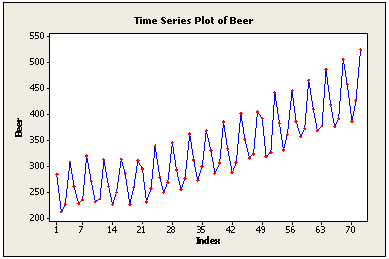

* The multiplicative model is useful when the seasonal variation increases over time.

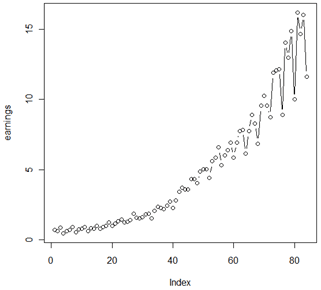

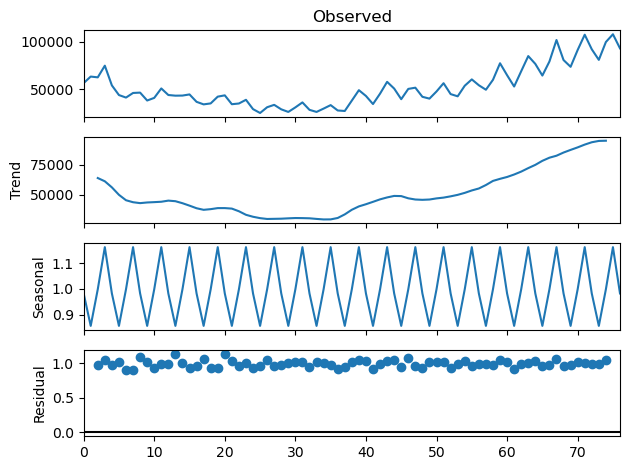

In [27]:
import statsmodels.api as sm

# multiplicative: yt = St x Tt x Et
res = sm.tsa.seasonal_decompose(VA_df.Loans.values, model="multiplicative",  period=4).plot() #ATTENTION not "freq"
#plt.figure(figsize=(16,12))

# Conclusions: 
* 1) Smooth long-term trend - YES; 
* 2) Seasonal variation - YES; 
* 3) Residual variation - centered around 1 

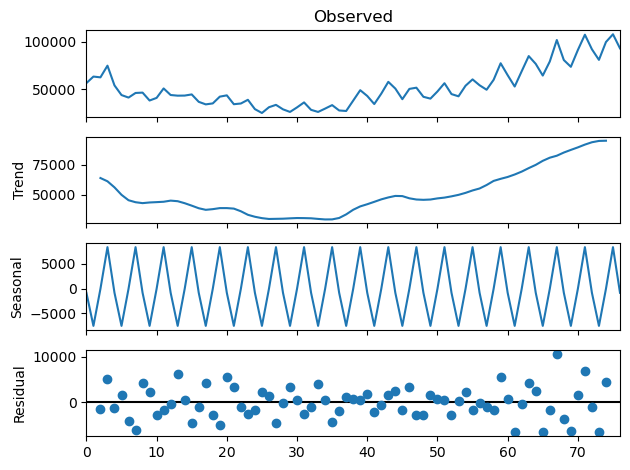

In [28]:
#additive decompostion yt=St+Tt+Et #see residual plot
res = sm.tsa.seasonal_decompose(VA_df.Loans.values, model="additive",  period=4).plot()

# Conclusions: 
* 1) Smooth long-term trend - YES; 
* 2) Seasonal variation - YES; 
* 3) Residual variation - centered around 0 

## Step 2. Reading in macro economic factors - The driver "X"s


* univariate "Loans"
* introduce co-variates, they can be any other data in line with the univariate  

In [29]:
Econ_df = pd.read_csv('./Inputs/Historic_Domestic.csv')

In [30]:
Econ_df.head()

Scenario Name     Date  Real GDP growth  Nominal GDP growth  \
0        Actual  1976 Q1              9.3                14.0   
1        Actual  1976 Q2              3.0                 7.2   
2        Actual  1976 Q3              2.2                 7.6   
3        Actual  1976 Q4              2.9                10.5   
4        Actual  1977 Q1              4.8                11.7   

   Real disposable income growth  Nominal disposable income growth  \
0                            4.9                               9.6   
1                            2.3                               5.8   
2                            3.2                               9.6   
3                            2.6                               9.2   
4                            0.9                               8.4   

   Unemployment rate  CPI inflation rate  3-month Treasury rate  \
0                7.7                 4.7                    4.9   
1                7.6                 3.6                    5.2   
2                7.7                 6.5                    5.2   
3                7.8                 5.9                    4.7   
4                7.5                 7.5                    4.6   

   5-year Treasury yield  10-year Treasury yield  BBB corporate yield  \
0                    7.4                     7.6                  9.4   
1                    7.4                     7.6                  9.4   
2                    7.3                     7.6                  9.1   
3                    6.5                     7.1                  8.8   
4                    6.8                     7.2                  8.8   

   Mortgage rate  Prime rate  Dow Jones Total Stock Market Index (Level)  \
0            8.9         6.8                                         NaN   
1            8.8         6.9                                         NaN   
2            9.0         7.1                                         NaN   
3            8.8         6.5                                         NaN   
4            8.7         6.3                                         NaN   

   House Price Index (Level)  Commercial Real Estate Price Index (Level)  \
0                       23.4                                        50.9   
1                       23.6                                        51.8   
2                       24.5                                        52.6   
3                       25.5                                        53.4   
4                       26.5                                        55.0   

   Market Volatility Index (Level)  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN

In [31]:
Econ_df.Date.dtype

dtype('O')

In [32]:
Econ_df.Date[:5]

0    1976 Q1
1    1976 Q2
2    1976 Q3
3    1976 Q4
4    1977 Q1
Name: Date, dtype: object

# Similarily, we create a key to join 2 sets. 

In [33]:
Econ_df["Quarters"] = [i.replace(" ", "") for i in Econ_df.Date]
Econ_df.Quarters[:5]

0    1976Q1
1    1976Q2
2    1976Q3
3    1976Q4
4    1977Q1
Name: Quarters, dtype: object

In [34]:
Econ_df.index = pd.to_datetime(Econ_df.Quarters)  #Convert the quarterly date to date index
Econ_df.head()

Scenario Name     Date  Real GDP growth  Nominal GDP growth  \
Quarters                                                                 
1976-01-01        Actual  1976 Q1              9.3                14.0   
1976-04-01        Actual  1976 Q2              3.0                 7.2   
1976-07-01        Actual  1976 Q3              2.2                 7.6   
1976-10-01        Actual  1976 Q4              2.9                10.5   
1977-01-01        Actual  1977 Q1              4.8                11.7   

            Real disposable income growth  Nominal disposable income growth  \
Quarters                                                                      
1976-01-01                            4.9                               9.6   
1976-04-01                            2.3                               5.8   
1976-07-01                            3.2                               9.6   
1976-10-01                            2.6                               9.2   
1977-01-01                            0.9                               8.4   

            Unemployment rate  CPI inflation rate  3-month Treasury rate  \
Quarters                                                                   
1976-01-01                7.7                 4.7                    4.9   
1976-04-01                7.6                 3.6                    5.2   
1976-07-01                7.7                 6.5                    5.2   
1976-10-01                7.8                 5.9                    4.7   
1977-01-01                7.5                 7.5                    4.6   

            5-year Treasury yield  10-year Treasury yield  \
Quarters                                                    
1976-01-01                    7.4                     7.6   
1976-04-01                    7.4                     7.6   
1976-07-01                    7.3                     7.6   
1976-10-01                    6.5                     7.1   
1977-01-01                    6.8                     7.2   

            BBB corporate yield  Mortgage rate  Prime rate  \
Quarters                                                     
1976-01-01                  9.4            8.9         6.8   
1976-04-01                  9.4            8.8         6.9   
1976-07-01                  9.1            9.0         7.1   
1976-10-01                  8.8            8.8         6.5   
1977-01-01                  8.8            8.7         6.3   

            Dow Jones Total Stock Market Index (Level)  \
Quarters                                                 
1976-01-01                                         NaN   
1976-04-01                                         NaN   
1976-07-01                                         NaN   
1976-10-01                                         NaN   
1977-01-01                                         NaN   

            House Price Index (Level)  \
Quarters                                
1976-01-01                       23.4   
1976-04-01                       23.6   
1976-07-01                       24.5   
1976-10-01                       25.5   
1977-01-01                       26.5   

            Commercial Real Estate Price Index (Level)  \
Quarters                                                 
1976-01-01                                        50.9   
1976-04-01                                        51.8   
1976-07-01                                        52.6   
1976-10-01                                        53.4   
1977-01-01                                        55.0   

            Market Volatility Index (Level) Quarters  
Quarters                                              
1976-01-01                              NaN   1976Q1  
1976-04-01                              NaN   1976Q2  
1976-07-01                              NaN   1976Q3  
1976-10-01                              NaN   1976Q4  
1977-01-01                              NaN   1977Q1

In [35]:
Econ_df.rename(columns={'Real GDP growth': 'rGDP', 
                        'Nominal GDP growth' : 'nGDP',
                        'Real disposable income growth' :'rDPI', 
                        'Nominal disposable income growth':'nDPI',                        
                        '3-month Treasury rate': 'TR3M',
                        '5-year Treasury yield': 'TR5Y' ,
                        '10-year Treasury yield': 'TR10Y',
                        'BBB corporate yield': 'BBBCY',       
                        'Mortgage rate': 'MR30Y',             
                        'Prime rate': 'PR',                
                         'Unemployment rate': 'UR', 
                         'CPI inflation rate': 'CPI',
                         'Dow Jones Total Stock Market Index (Level)' :'DJTSMI',
                         'House Price Index (Level)' : 'HPI',
                         'Commercial Real Estate Price Index (Level)' : 'CREP',
                         'Market Volatility Index (Level)' : 'VIX'
                       }, inplace=True) 

In [36]:
Econ_df.columns

Index(['Scenario Name', 'Date', 'rGDP', 'nGDP', 'rDPI', 'nDPI', 'UR', 'CPI',
       'TR3M', 'TR5Y', 'TR10Y', 'BBBCY', 'MR30Y', 'PR', 'DJTSMI', 'HPI',
       'CREP', 'VIX', 'Quarters'],
      dtype='object')

Text(0.5, 1.0, 'TR5Y')

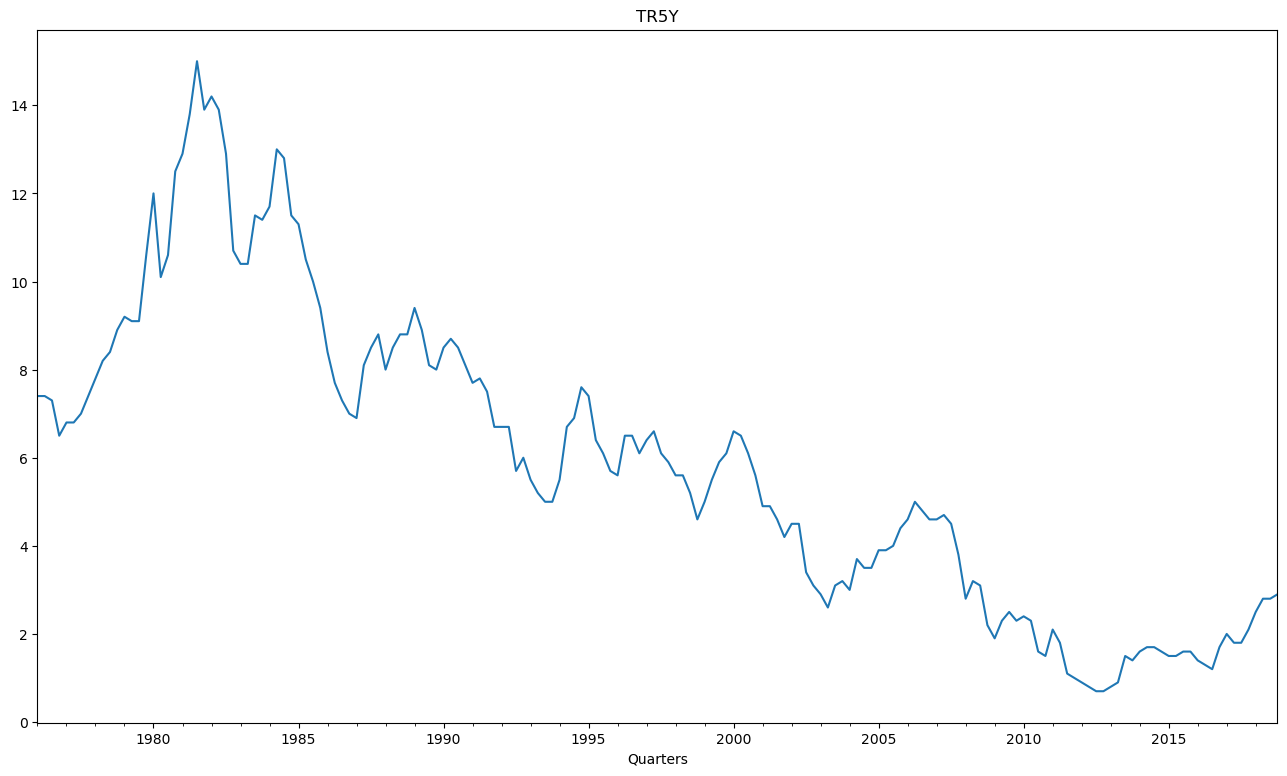

In [37]:
plot_macro_var = "TR5Y" # or any other variables
plt.figure(figsize = (16,9))
Econ_df[plot_macro_var].plot()
plt.title(plot_macro_var)

#### Note: For macro economic data, there should be no data quality issue since it is published by Federal Reserve Bank and used by many banks already

### Merge the target variable Y and independent variable Xs

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
VA_Econ_df = pd.merge(VA_df, Econ_df , how='left', left_index = True, right_index = True)
VA_Econ_df.head()

FISCAL_YEAR        F_QTR  Loans Quarters_x Scenario Name     Date  \
Quarters                                                                        
1999-01-01         1999  1st Quarter  56542     1999Q1        Actual  1999 Q1   
1999-04-01         1999  2nd Quarter  63390     1999Q2        Actual  1999 Q2   
1999-07-01         1999  3rd Quarter  62575     1999Q3        Actual  1999 Q3   
1999-10-01         1999  4th Quarter  74827     1999Q4        Actual  1999 Q4   
2000-01-01         2000  1st Quarter  54115     2000Q1        Actual  2000 Q1   

            rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  BBBCY  MR30Y  \
Quarters                                                                        
1999-01-01   3.8   5.4   3.7   4.7  4.3  1.5   4.4   5.0    5.4    6.8    6.9   
1999-04-01   3.1   4.6   0.9   3.1  4.3  3.0   4.5   5.5    5.8    7.2    7.2   
1999-07-01   5.3   6.8   2.8   5.0  4.2  3.0   4.7   5.9    6.2    7.7    7.8   
1999-10-01   7.0   9.3   6.1   8.7  4.1  3.0   5.0   6.1    6.5    7.9    7.8   
2000-01-01   1.5   4.2   7.9  11.5  4.0  4.0   5.5   6.6    6.7    8.2    8.3   

             PR   DJTSMI    HPI   CREP   VIX Quarters_y  
Quarters                                                 
1999-01-01  7.8  11707.7   93.9  124.3  33.0     1999Q1  
1999-04-01  7.8  12583.6   95.8  121.8  28.9     1999Q2  
1999-07-01  8.1  11713.8   97.7  126.6  28.5     1999Q3  
1999-10-01  8.4  13812.7   99.8  129.5  28.8     1999Q4  
2000-01-01  8.7  14296.2  102.3  126.4  27.0     2000Q1

In [40]:
VA_Econ_df.shape

(77, 23)

In [41]:
# drop the columns that are not informative for modeling
VA_Econ_df.drop(['FISCAL_YEAR', 'F_QTR','Quarters_x', 'Scenario Name','Date', 'Quarters_y'],axis=1, inplace = True)

In [42]:
# list column numbers
VA_Econ_df.columns

Index(['Loans', 'rGDP', 'nGDP', 'rDPI', 'nDPI', 'UR', 'CPI', 'TR3M', 'TR5Y',
       'TR10Y', 'BBBCY', 'MR30Y', 'PR', 'DJTSMI', 'HPI', 'CREP', 'VIX'],
      dtype='object')

In [43]:
# Check how many missing values are in the data
VA_Econ_df.isnull().sum()

Loans     0
rGDP      0
nGDP      0
rDPI      0
nDPI      0
UR        0
CPI       0
TR3M      0
TR5Y      0
TR10Y     0
BBBCY     0
MR30Y     0
PR        0
DJTSMI    0
HPI       0
CREP      0
VIX       0
dtype: int64


## Step 3. Seasonality Adjustment

<Axes: xlabel='Quarters'>

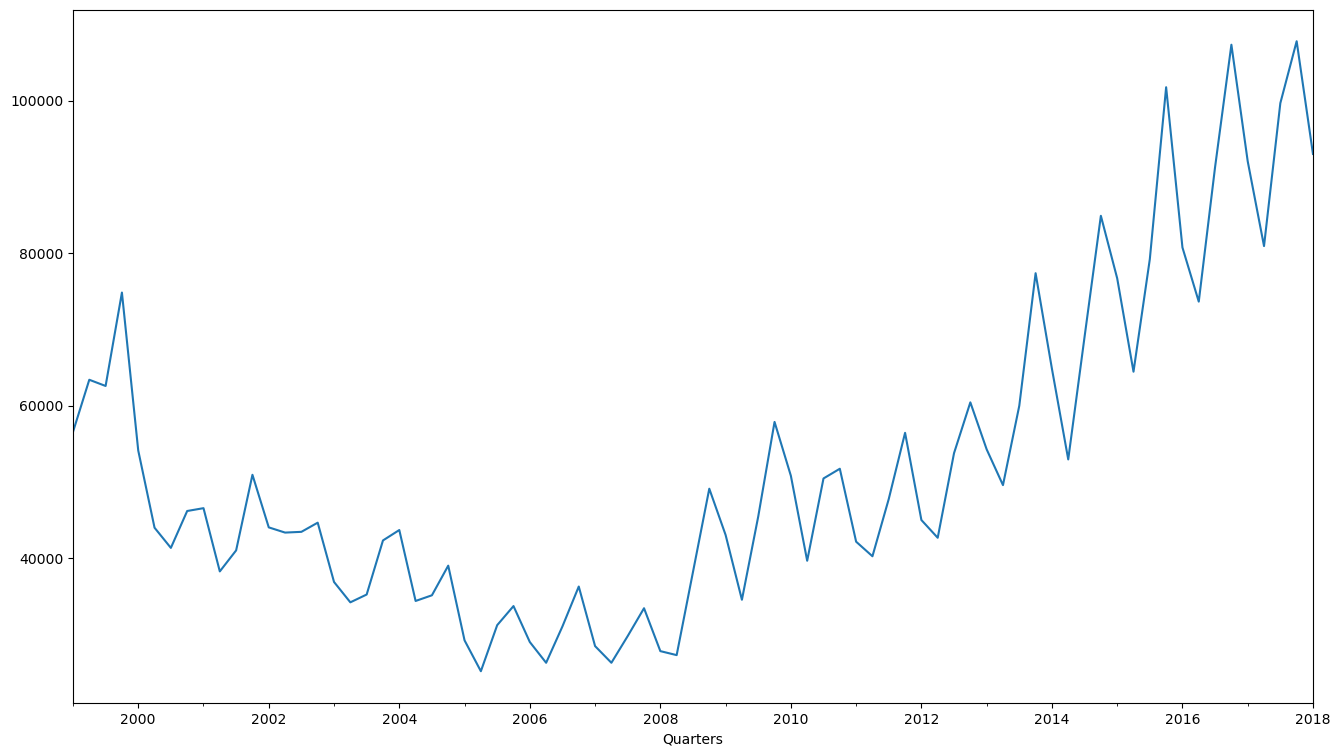

In [44]:
plt.figure(figsize = (16,9))
VA_Econ_df['Loans'].plot()

## Step 4. Stationary

<center><img src="Inputs/stationary1.png" width="800" height="800" /></center>

### Using `sm.tsa.stattools.adfuller` function to test the stationary of TS called `Augmented Dickey-Fuller unit root test.`
* https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html 

In [45]:
VA_Econ_df.head()

Loans  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  BBBCY  \
Quarters                                                                        
1999-01-01  56542   3.8   5.4   3.7   4.7  4.3  1.5   4.4   5.0    5.4    6.8   
1999-04-01  63390   3.1   4.6   0.9   3.1  4.3  3.0   4.5   5.5    5.8    7.2   
1999-07-01  62575   5.3   6.8   2.8   5.0  4.2  3.0   4.7   5.9    6.2    7.7   
1999-10-01  74827   7.0   9.3   6.1   8.7  4.1  3.0   5.0   6.1    6.5    7.9   
2000-01-01  54115   1.5   4.2   7.9  11.5  4.0  4.0   5.5   6.6    6.7    8.2   

            MR30Y   PR   DJTSMI    HPI   CREP   VIX  
Quarters                                             
1999-01-01    6.9  7.8  11707.7   93.9  124.3  33.0  
1999-04-01    7.2  7.8  12583.6   95.8  121.8  28.9  
1999-07-01    7.8  8.1  11713.8   97.7  126.6  28.5  
1999-10-01    7.8  8.4  13812.7   99.8  129.5  28.8  
2000-01-01    8.3  8.7  14296.2  102.3  126.4  27.0

In [47]:
pickle.dump(VA_Econ_df, open("VA_Econ_df.pkl", "wb"))

In [5]:
VA_Econ_df = pickle.load(open("VA_Econ_df.pkl", "rb"))

In [46]:
test_data = VA_Econ_df

#create place holder for ADF tests on every TS column
ADFResults = pd.DataFrame(data = np.zeros((len(test_data.columns), 4)),
                            columns = ["ADF Stats", "pvalue", "lags","Stationary"], index=test_data.columns)

 ## ADF syntax: statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False),
 ## The default maxlag is $$ 12 * (nobs/100)^{1/4} $$

In [47]:
#loop over ADF test on all columns
for i in range(len(test_data.columns)):
    '''test null hypothesis of the Augmented Dickey-Fuller to see if there is a unit root '''
    
    print(sm.tsa.stattools.adfuller(test_data.iloc[:,i]))
    
    ADFResults.iloc[i,0]=sm.tsa.stattools.adfuller(test_data.iloc[:,i])[0] #ADF statistics

    ADFResults.iloc[i,1]=round(sm.tsa.stattools.adfuller(test_data.iloc[:,i])[1],4) #p-value , if >0.05 non-stationary else stationary
    
    ADFResults.iloc[i,2]=sm.tsa.stattools.adfuller(test_data.iloc[:,i])[2] #lags used
    
    ADFResults.iloc[i,3]=  ('Yes' if ADFResults.iloc[i,1]<0.05 else 'No') #stationart Yes/No based on p-value
    
ADFResults #if p-value > 0.05, non-stationary otherwise stationary 

(1.0227579864103733, 0.9945003614023564, 6, 70, {'1%': -3.5274258688046647, '5%': -2.903810816326531, '10%': -2.5893204081632653}, 1265.1225076329176)
(-6.137602384846784, 8.115727730982795e-08, 0, 76, {'1%': -3.5194805351545413, '5%': -2.9003945086747343, '10%': -2.5874984279778395}, 282.1340733622756)
(-5.5341763067210765, 1.7599531182364783e-06, 0, 76, {'1%': -3.5194805351545413, '5%': -2.9003945086747343, '10%': -2.5874984279778395}, 298.4794289794446)
(-12.304141975536046, 7.336223741500919e-23, 0, 76, {'1%': -3.5194805351545413, '5%': -2.9003945086747343, '10%': -2.5874984279778395}, 349.92618548579765)
(-10.488927034635779, 1.1606259907170716e-18, 0, 76, {'1%': -3.5194805351545413, '5%': -2.9003945086747343, '10%': -2.5874984279778395}, 364.5957424904058)
(-2.441173567280973, 0.13045098790474935, 2, 74, {'1%': -3.5219803175527606, '5%': -2.9014701097664504, '10%': -2.58807215485756}, -10.812127484360474)
(-6.88682340476437, 1.3877386553394666e-09, 0, 76, {'1%': -3.51948053515454

ADF Stats  pvalue  lags Stationary
Loans    1.022758  0.9945   6.0         No
rGDP    -6.137602  0.0000   0.0        Yes
nGDP    -5.534176  0.0000   0.0        Yes
rDPI   -12.304142  0.0000   0.0        Yes
nDPI   -10.488927  0.0000   0.0        Yes
UR      -2.441174  0.1305   2.0         No
CPI     -6.886823  0.0000   0.0        Yes
TR3M    -3.345390  0.0130   3.0        Yes
TR5Y    -2.416024  0.1373   3.0         No
TR10Y   -2.073717  0.2552   3.0         No
BBBCY   -1.792071  0.3844   1.0         No
MR30Y   -1.577750  0.4948   2.0         No
PR      -3.134844  0.0241   3.0        Yes
DJTSMI   0.940301  0.9936   0.0         No
HPI     -1.786072  0.3874   5.0         No
CREP    -1.087314  0.7201   1.0         No
VIX     -4.156280  0.0008   0.0        Yes

In [48]:
t = pd.Series([1,3,4])
t.diff()

0    NaN
1    2.0
2    1.0
dtype: float64

# How to make TS stationary? Take a difference `.diff()` 

In [49]:
VA_Econ_df.head(2)

Loans  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  BBBCY  \
Quarters                                                                        
1999-01-01  56542   3.8   5.4   3.7   4.7  4.3  1.5   4.4   5.0    5.4    6.8   
1999-04-01  63390   3.1   4.6   0.9   3.1  4.3  3.0   4.5   5.5    5.8    7.2   

            MR30Y   PR   DJTSMI   HPI   CREP   VIX  
Quarters                                            
1999-01-01    6.9  7.8  11707.7  93.9  124.3  33.0  
1999-04-01    7.2  7.8  12583.6  95.8  121.8  28.9

In [50]:
#VA_Econ_df.diff(1)

In [51]:
VA_Econ_diff = VA_Econ_df.diff(1).iloc[1:]
VA_Econ_diff.head()

Loans  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  \
Quarters                                                                   
1999-04-01   6848.0  -0.7  -0.8  -2.8  -1.6  0.0  1.5   0.1   0.5    0.4   
1999-07-01   -815.0   2.2   2.2   1.9   1.9 -0.1  0.0   0.2   0.4    0.4   
1999-10-01  12252.0   1.7   2.5   3.3   3.7 -0.1  0.0   0.3   0.2    0.3   
2000-01-01 -20712.0  -5.5  -5.1   1.8   2.8 -0.1  1.0   0.5   0.5    0.2   
2000-04-01 -10132.0   6.0   6.0  -3.4  -5.1 -0.1 -0.8   0.2  -0.1   -0.3   

            BBBCY  MR30Y   PR  DJTSMI  HPI  CREP  VIX  
Quarters                                               
1999-04-01    0.4    0.3  0.0   875.9  1.9  -2.5 -4.1  
1999-07-01    0.5    0.6  0.3  -869.8  1.9   4.8 -0.4  
1999-10-01    0.2    0.0  0.3  2098.9  2.1   2.9  0.3  
2000-01-01    0.3    0.5  0.3   483.5  2.5  -3.1 -1.8  
2000-04-01    0.3    0.0  0.5  -677.7  2.6  -1.3  6.5

In [52]:
test_data = VA_Econ_diff #copy to test_data

ADFResults = pd.DataFrame(data = np.zeros((len(test_data.columns), 4)),
                            columns = ["ADF Stats", "pvalue","lags","Stationary"], index=test_data.columns)
for i in range(len(test_data.columns)):
    ADFResults.iloc[i,0]=sm.tsa.stattools.adfuller(test_data.iloc[:,i])[0]
    ADFResults.iloc[i,1]=round(sm.tsa.stattools.adfuller(test_data.iloc[:,i])[1],4)
    ADFResults.iloc[i,2]=sm.tsa.stattools.adfuller(test_data.iloc[:,i])[2]
    ADFResults.iloc[i,3]=  ('Yes' if ADFResults.iloc[i,1]<0.05 else 'No')
ADFResults

ADF Stats  pvalue  lags Stationary
Loans   -2.929831  0.0420   4.0        Yes
rGDP    -8.686597  0.0000   1.0        Yes
nGDP    -8.901249  0.0000   1.0        Yes
rDPI    -7.322746  0.0000   3.0        Yes
nDPI    -7.256407  0.0000   3.0        Yes
UR      -3.396900  0.0111   0.0        Yes
CPI     -6.673927  0.0000   4.0        Yes
TR3M    -3.606517  0.0056   4.0        Yes
TR5Y    -3.729230  0.0037   2.0        Yes
TR10Y   -5.216801  0.0000   3.0        Yes
BBBCY   -6.567532  0.0000   0.0        Yes
MR30Y   -7.119672  0.0000   1.0        Yes
PR      -3.566170  0.0064   4.0        Yes
DJTSMI  -7.707991  0.0000   0.0        Yes
HPI     -2.698611  0.0743   3.0         No
CREP    -5.403651  0.0000   0.0        Yes
VIX     -6.770827  0.0000   3.0        Yes

### Varaible Transformation (Will keep upgrading through modeling process)

In [53]:
Econ_df.columns

Index(['Scenario Name', 'Date', 'rGDP', 'nGDP', 'rDPI', 'nDPI', 'UR', 'CPI',
       'TR3M', 'TR5Y', 'TR10Y', 'BBBCY', 'MR30Y', 'PR', 'DJTSMI', 'HPI',
       'CREP', 'VIX', 'Quarters'],
      dtype='object')

In [54]:
# data preparation, including calculate diff and lags
# Y variables transformation
VA_Econ_df['Loan_diff'] = VA_Econ_df['Loans'].diff() 
VA_Econ_df['Loan_logdiff'] = np.log(VA_Econ_df['Loans']).diff()

# X variables transformation
VA_Econ_df['MR_diff'] = VA_Econ_df['MR30Y'].diff()
VA_Econ_df['UR_diff'] = VA_Econ_df['UR'].diff()
VA_Econ_df['TR5YR_diff'] = VA_Econ_df['TR5Y'].diff()
VA_Econ_df['TR10YR_diff'] = VA_Econ_df['TR10Y'].diff()
VA_Econ_df['BBB_diff'] = VA_Econ_df['BBBCY'].diff()
VA_Econ_df['HPI_diff'] = VA_Econ_df['HPI'].diff()

#get percentage change by data engineering
VA_Econ_df['MR_pct'] = VA_Econ_df['MR30Y'].pct_change()*100
VA_Econ_df['HPI_pct'] = VA_Econ_df['HPI'].pct_change()*100
VA_Econ_df['DJTSM_pct'] = VA_Econ_df['DJTSMI'].pct_change()*100
VA_Econ_df['UR_pct'] = VA_Econ_df['UR'].pct_change()*100

#get lag by 1
VA_Econ_df['UR_diff_lag1'] = VA_Econ_df['UR_diff'].shift(1)
VA_Econ_df['MR_diff_lag1'] = VA_Econ_df['MR_diff'].shift()
VA_Econ_df['HPI_pct_lag1'] = VA_Econ_df['HPI_pct'].shift()
VA_Econ_df['MR_pct_lag1'] = VA_Econ_df['MR_pct'].shift()
VA_Econ_df['UR_pct_lag1'] = VA_Econ_df['UR_pct'].shift()

#get lag by 2
VA_Econ_df['UR_diff_lag2'] = VA_Econ_df['UR_diff'].shift(2)
VA_Econ_df['MR_diff_lag2'] = VA_Econ_df['MR_diff'].shift(2)
VA_Econ_df['HPI_pct_lag2'] = VA_Econ_df['HPI_pct'].shift(2)
VA_Econ_df['MR_pct_lag2'] = VA_Econ_df['MR_pct'].shift(2)
VA_Econ_df['UR_pct_lag2'] = VA_Econ_df['UR_pct'].shift(2)

# taking lag of a set of data by .shift()

In [55]:
VA_Econ_df.shape

(77, 39)

In [56]:
VA_Econ_df.head()

Loans  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  BBBCY  \
Quarters                                                                        
1999-01-01  56542   3.8   5.4   3.7   4.7  4.3  1.5   4.4   5.0    5.4    6.8   
1999-04-01  63390   3.1   4.6   0.9   3.1  4.3  3.0   4.5   5.5    5.8    7.2   
1999-07-01  62575   5.3   6.8   2.8   5.0  4.2  3.0   4.7   5.9    6.2    7.7   
1999-10-01  74827   7.0   9.3   6.1   8.7  4.1  3.0   5.0   6.1    6.5    7.9   
2000-01-01  54115   1.5   4.2   7.9  11.5  4.0  4.0   5.5   6.6    6.7    8.2   

            MR30Y   PR   DJTSMI    HPI   CREP   VIX  Loan_diff  Loan_logdiff  \
Quarters                                                                       
1999-01-01    6.9  7.8  11707.7   93.9  124.3  33.0        NaN           NaN   
1999-04-01    7.2  7.8  12583.6   95.8  121.8  28.9     6848.0      0.114322   
1999-07-01    7.8  8.1  11713.8   97.7  126.6  28.5     -815.0     -0.012940   
1999-10-01    7.8  8.4  13812.7   99.8  129.5  28.8    12252.0      0.178813   
2000-01-01    8.3  8.7  14296.2  102.3  126.4  27.0   -20712.0     -0.324067   

            MR_diff  UR_diff  TR5YR_diff  TR10YR_diff  BBB_diff  HPI_diff  \
Quarters                                                                    
1999-01-01      NaN      NaN         NaN          NaN       NaN       NaN   
1999-04-01      0.3      0.0         0.5          0.4       0.4       1.9   
1999-07-01      0.6     -0.1         0.4          0.4       0.5       1.9   
1999-10-01      0.0     -0.1         0.2          0.3       0.2       2.1   
2000-01-01      0.5     -0.1         0.5          0.2       0.3       2.5   

              MR_pct   HPI_pct  DJTSM_pct    UR_pct  UR_diff_lag1  \
Quarters                                                            
1999-01-01       NaN       NaN        NaN       NaN           NaN   
1999-04-01  4.347826  2.023429   7.481401  0.000000           NaN   
1999-07-01  8.333333  1.983299  -6.912171 -2.325581           0.0   
1999-10-01  0.000000  2.149437  17.918182 -2.380952          -0.1   
2000-01-01  6.410256  2.505010   3.500402 -2.439024          -0.1   

            MR_diff_lag1  HPI_pct_lag1  MR_pct_lag1  UR_pct_lag1  \
Quarters                                                           
1999-01-01           NaN           NaN          NaN          NaN   
1999-04-01           NaN           NaN          NaN          NaN   
1999-07-01           0.3      2.023429     4.347826     0.000000   
1999-10-01           0.6      1.983299     8.333333    -2.325581   
2000-01-01           0.0      2.149437     0.000000    -2.380952   

            UR_diff_lag2  MR_diff_lag2  HPI_pct_lag2  MR_pct_lag2  UR_pct_lag2  
Quarters                                                                        
1999-01-01           NaN           NaN           NaN          NaN          NaN  
1999-04-01           NaN           NaN           NaN          NaN          NaN  
1999-07-01           NaN           NaN           NaN          NaN          NaN  
1999-10-01           0.0           0.3      2.023429     4.347826     0.000000  
2000-01-01          -0.1           0.6      1.983299     8.333333    -2.325581

In [57]:
# Creating Dummy Variables for some/any reason
VA_Econ_df['Dummy1'] = 0
VA_Econ_df.loc['2009-01-31':'2018-01-01', 'Dummy1']=1

In [58]:
#VA_Econ_df.const = 0.3

In [59]:
# # create the constant variable of 1 as intercept term OLS model
# VA_Econ_df.insert(0, 'const', 0.3)

In [60]:
VA_Econ_df.tail() #endogenous vs exogenous

Loans  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  \
Quarters                                                                  
2017-01-01   92047   1.8   3.9   4.5   6.6  4.6  3.0   0.6   2.0    2.5   
2017-04-01   80925   3.0   4.2   2.2   3.0  4.4  0.1   0.9   1.8    2.3   
2017-07-01   99671   2.8   4.8   2.2   3.9  4.3  2.1   1.0   1.8    2.3   
2017-10-01  107791   2.3   5.1   2.3   5.1  4.1  3.3   1.2   2.1    2.4   
2018-01-01   93006   2.2   4.3   4.4   7.0  4.1  3.5   1.6   2.5    2.8   

            BBBCY  MR30Y   PR   DJTSMI    HPI   CREP   VIX  Loan_diff  \
Quarters                                                                
2017-01-01    4.2    4.2  3.8  24508.3  187.3  259.7  13.1   -15284.0   
2017-04-01    4.0    4.0  4.0  25125.0  189.9  269.2  16.0   -11122.0   
2017-07-01    3.9    3.9  4.3  26148.5  193.2  274.1  16.0    18746.0   
2017-10-01    3.9    3.9  4.3  27673.2  196.2  282.6  13.1     8120.0   
2018-01-01    4.2    4.3  4.5  27383.0  199.3  276.9  37.3   -14785.0   

            Loan_logdiff  MR_diff  UR_diff  TR5YR_diff  TR10YR_diff  BBB_diff  \
Quarters                                                                        
2017-01-01     -0.153618      0.4     -0.2         0.3          0.3       0.1   
2017-04-01     -0.128777     -0.2     -0.2        -0.2         -0.2      -0.2   
2017-07-01      0.208352     -0.1     -0.1         0.0          0.0      -0.1   
2017-10-01      0.078319      0.0     -0.2         0.3          0.1       0.0   
2018-01-01     -0.147530      0.4      0.0         0.4          0.4       0.3   

            HPI_diff     MR_pct   HPI_pct  DJTSM_pct    UR_pct  UR_diff_lag1  \
Quarters                                                                       
2017-01-01       2.4  10.526316  1.297999   5.291128 -4.166667          -0.1   
2017-04-01       2.6  -4.761905  1.388147   2.516290 -4.347826          -0.2   
2017-07-01       3.3  -2.500000  1.737757   4.073632 -2.272727          -0.2   
2017-10-01       3.0   0.000000  1.552795   5.830927 -4.651163          -0.1   
2018-01-01       3.1  10.256410  1.580020  -1.048668  0.000000          -0.2   

            MR_diff_lag1  HPI_pct_lag1  MR_pct_lag1  UR_pct_lag1  \
Quarters                                                           
2017-01-01           0.4      1.593407    11.764706    -2.040816   
2017-04-01           0.4      1.297999    10.526316    -4.166667   
2017-07-01          -0.2      1.388147    -4.761905    -4.347826   
2017-10-01          -0.1      1.737757    -2.500000    -2.272727   
2018-01-01           0.0      1.552795     0.000000    -4.651163   

            UR_diff_lag2  MR_diff_lag2  HPI_pct_lag2  MR_pct_lag2  \
Quarters                                                            
2017-01-01           0.0          -0.2      1.449275    -5.555556   
2017-04-01          -0.1           0.4      1.593407    11.764706   
2017-07-01          -0.2           0.4      1.297999    10.526316   
2017-10-01          -0.2          -0.2      1.388147    -4.761905   
2018-01-01          -0.1          -0.1      1.737757    -2.500000   

            UR_pct_lag2  Dummy1  
Quarters                         
2017-01-01     0.000000       1  
2017-04-01    -2.040816       1  
2017-07-01    -4.166667       1  
2017-10-01    -4.347826       1  
2018-01-01    -2.272727       1

Filter out the first two rows to remove NA's; The data now starts from fourth quarters of 1999

In [61]:
VA_Econ_trn_df = VA_Econ_df[3:]
VA_Econ_trn_df.tail()

Loans  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  \
Quarters                                                                  
2017-01-01   92047   1.8   3.9   4.5   6.6  4.6  3.0   0.6   2.0    2.5   
2017-04-01   80925   3.0   4.2   2.2   3.0  4.4  0.1   0.9   1.8    2.3   
2017-07-01   99671   2.8   4.8   2.2   3.9  4.3  2.1   1.0   1.8    2.3   
2017-10-01  107791   2.3   5.1   2.3   5.1  4.1  3.3   1.2   2.1    2.4   
2018-01-01   93006   2.2   4.3   4.4   7.0  4.1  3.5   1.6   2.5    2.8   

            BBBCY  MR30Y   PR   DJTSMI    HPI   CREP   VIX  Loan_diff  \
Quarters                                                                
2017-01-01    4.2    4.2  3.8  24508.3  187.3  259.7  13.1   -15284.0   
2017-04-01    4.0    4.0  4.0  25125.0  189.9  269.2  16.0   -11122.0   
2017-07-01    3.9    3.9  4.3  26148.5  193.2  274.1  16.0    18746.0   
2017-10-01    3.9    3.9  4.3  27673.2  196.2  282.6  13.1     8120.0   
2018-01-01    4.2    4.3  4.5  27383.0  199.3  276.9  37.3   -14785.0   

            Loan_logdiff  MR_diff  UR_diff  TR5YR_diff  TR10YR_diff  BBB_diff  \
Quarters                                                                        
2017-01-01     -0.153618      0.4     -0.2         0.3          0.3       0.1   
2017-04-01     -0.128777     -0.2     -0.2        -0.2         -0.2      -0.2   
2017-07-01      0.208352     -0.1     -0.1         0.0          0.0      -0.1   
2017-10-01      0.078319      0.0     -0.2         0.3          0.1       0.0   
2018-01-01     -0.147530      0.4      0.0         0.4          0.4       0.3   

            HPI_diff     MR_pct   HPI_pct  DJTSM_pct    UR_pct  UR_diff_lag1  \
Quarters                                                                       
2017-01-01       2.4  10.526316  1.297999   5.291128 -4.166667          -0.1   
2017-04-01       2.6  -4.761905  1.388147   2.516290 -4.347826          -0.2   
2017-07-01       3.3  -2.500000  1.737757   4.073632 -2.272727          -0.2   
2017-10-01       3.0   0.000000  1.552795   5.830927 -4.651163          -0.1   
2018-01-01       3.1  10.256410  1.580020  -1.048668  0.000000          -0.2   

            MR_diff_lag1  HPI_pct_lag1  MR_pct_lag1  UR_pct_lag1  \
Quarters                                                           
2017-01-01           0.4      1.593407    11.764706    -2.040816   
2017-04-01           0.4      1.297999    10.526316    -4.166667   
2017-07-01          -0.2      1.388147    -4.761905    -4.347826   
2017-10-01          -0.1      1.737757    -2.500000    -2.272727   
2018-01-01           0.0      1.552795     0.000000    -4.651163   

            UR_diff_lag2  MR_diff_lag2  HPI_pct_lag2  MR_pct_lag2  \
Quarters                                                            
2017-01-01           0.0          -0.2      1.449275    -5.555556   
2017-04-01          -0.1           0.4      1.593407    11.764706   
2017-07-01          -0.2           0.4      1.297999    10.526316   
2017-10-01          -0.2          -0.2      1.388147    -4.761905   
2018-01-01          -0.1          -0.1      1.737757    -2.500000   

            UR_pct_lag2  Dummy1  
Quarters                         
2017-01-01     0.000000       1  
2017-04-01    -2.040816       1  
2017-07-01    -4.166667       1  
2017-10-01    -4.347826       1  
2018-01-01    -2.272727       1

## Step 5. Modeling

* Modeling on real life data, results may not be ideal. 
* "All models are wrong, some are useful" --- George Box 
* Combining theories with industry best practice: Academic v.s Industry  

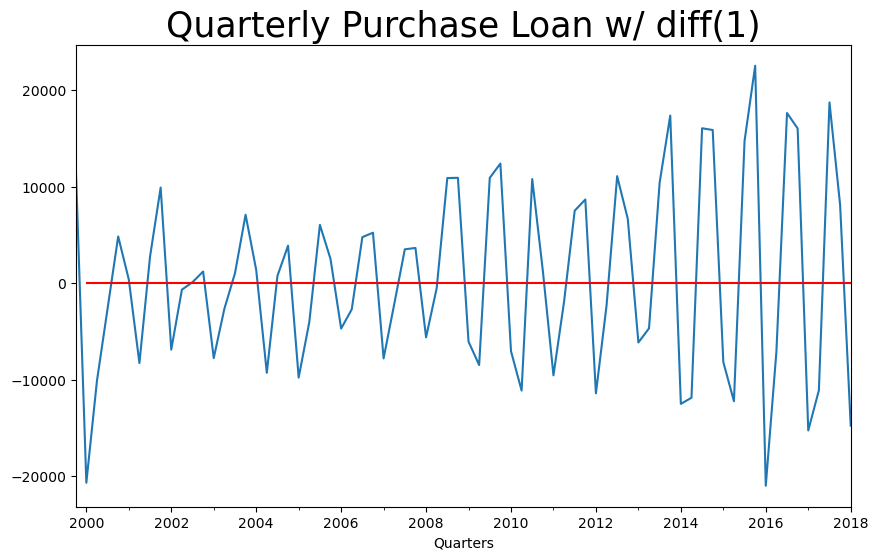

In [62]:
VA_Econ_trn_df['Loan_diff'].plot(figsize = (10,6)) 
plt.title("Quarterly Purchase Loan w/ diff(1)", size = 25)
plt.hlines(y = 0, xmin = "2000", xmax = "2018", color = "red")
#Note: too much volatility, it is going to be a difficult model

# ARIMA Model (Autoregressive Integrated Moving Average)

## A second type of time series model is the univariate/multivariate model when the past values of the `dependent variable` are used to predict its future values. One popular, relatively general class of univariate time-series models is the Autoregressive Integrated Moving Average (ARIMA) form. 

## Types of Time Series Models

* **OLS Regression**  
* Auto-regressive moving average models (ARMA)  
*ARIMA   (pdq)
*ARIMAX (ARIMA with Explanatory Variable)

* Vector autoregression (VAR) models
* Filtering tools (Hodrick-Prescott and others)
* Bayesian dynamic linear models (DLMs), ARCH/GARCH volatility models
* and all the variants


!<center><img src="Inputs/AR1.PNG" width="1000" height="800" /></center>

* Autocorrelation Function (ACF) 
* Partial Autocorrelation Function (PACF)

### Autocorrelation versus degree of persistence (ACF plot), refer to https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c 

<center><img src="Inputs/AR2.PNG" width="650" height="400" /></center>

# ACF is an auto-correlation function which gives us values of auto-correlation of any series with its lagged values. In simple terms, it describes how well the present value of the series is related with its past values meaured by $\phi$. We plot these values along with the confidence band. 

## AR simulations versus degree of persistence (another word for correlation)

<center><img src="Inputs/AR3.PNG" width="1000" height="800" /></center>

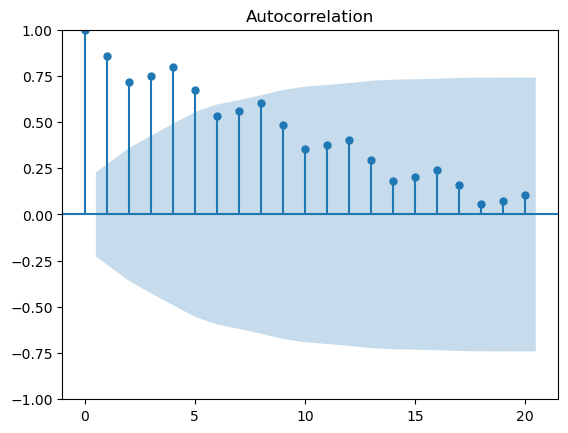

In [63]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plot_acf(VA_Econ_trn_df['Loans'], lags=20) #This blue area depicts the 95% confidence interval, eyeball p = 6

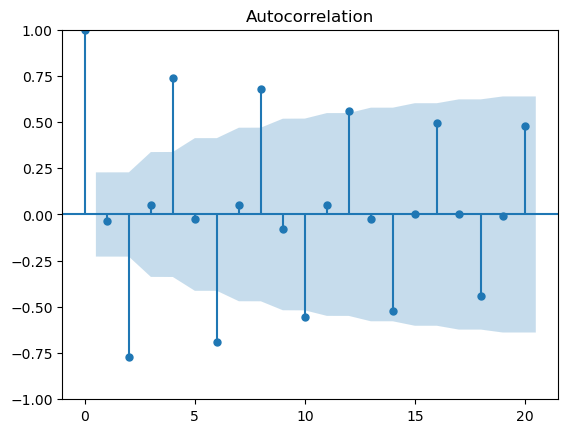

In [64]:
fig = plot_acf(VA_Econ_trn_df['Loan_diff'], lags=20) 

# The partial autocorrelation at lag of k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.  
# Basically, the ACF (or Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are used to figure out the order of AR (p), MA (q) of ARIMA


— Page 81, Section 4.5.6 Partial Autocorrelations, Introductory Time Series with R.  
 https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

# methodstr: Specifies which method for the calculations to use:

“ywm” or “ywmle” : Yule-Walker without adjustment. Default.

“yw” or “ywadjusted” : Yule-Walker with sample-size adjustment in denominator for acovf. Default.

“ols” : regression of time series on lags of it and on constant.

“ols-inefficient” : regression of time series on lags using a single common sample to estimate all pacf coefficients.

“ols-adjusted” : regression of time series on lags with a bias adjustment.

“ld” or “ldadjusted” : Levinson-Durbin recursion with bias correction.

“ldb” or “ldbiased” : Levinson-Durbin recursion without bias correction.


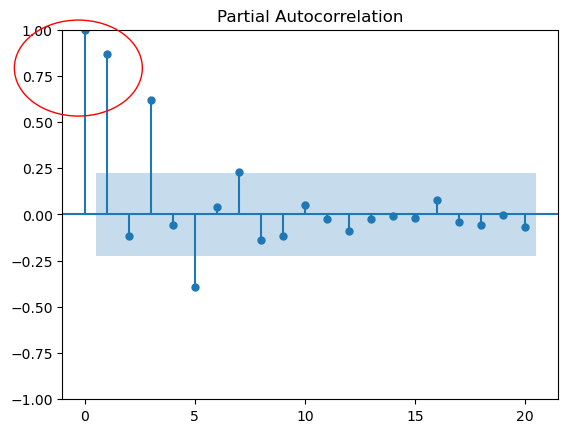

In [65]:
from statsmodels.graphics.tsaplots import plot_pacf
fig = plot_pacf(VA_Econ_df['Loans'], lags=20, method='ywm') #This blue area depicts the 95% confidence interval
circle1 = plt.Circle((0.15, 0.8), 0.1, color='r',  fill=False)
fig.add_artist(circle1)

## Conclusion:  from the PACF plot, we claim a strong AR(1) presents, with 3 or 5 as minor because they are also out of 95% CI .

In [7]:
trn_idx = int(len(VA_Econ_df)*0.9)

In [67]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
arima_model = ARIMA(VA_Econ_df.Loans.values[:trn_idx], order=(1,1,1))
arima_fit = arima_model.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   69
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -714.136
Date:                Sat, 11 Nov 2023   AIC                           1434.272
Time:                        17:50:39   BIC                           1440.930
Sample:                             0   HQIC                          1436.910
                                 - 69                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5714      0.219      2.608      0.009       0.142       1.001
ma.L1         -0.7871      0.177     -4.441      0.000      -1.134      -0.440
sigma2      7.958e+07   1.05e-09    7.6e+16      0.0

In [68]:
forcast_len = len(VA_Econ_df.Loans.values[trn_idx:])
forcast_len

8

In [69]:
y_pred = arima_fit.forecast(forcast_len, alpha=0.05)

/home/dada/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [70]:
# IN sample Mean Absolute Percentage Error
np.mean(np.abs(y_pred/VA_Econ_df.Loans.values[trn_idx:]-1)) * 100 #16%

16.034455655935332

# use auto arima to figure out order of `pdq`
#!pip install pmdarima

In [46]:
try:
    import pmdarima
except:
    !pip install pmdarima
    import pmdarima

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 615.0/615.0 kB 9.8 MB/s eta 0:00:00


In [47]:
import pmdarima
pmdarima.__version__

'2.0.4'

In [71]:
from pmdarima.arima import auto_arima

In [72]:
pqd_fit = auto_arima(VA_Econ_df.Loans.values[:trn_idx], error_action='ignore', seasonal=True, m=4) #fit yearly arima

In [73]:
print(pqd_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   69
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 4)   Log Likelihood                -631.401
Date:                            Sat, 11 Nov 2023   AIC                           1270.801
Time:                                    17:50:49   BIC                           1279.437
Sample:                                         0   HQIC                          1274.203
                                             - 69                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7274      0.101     -7.200      0.000      -0.925      -0.529
ma.L1          0.9284      0.108   

In [74]:
VA_Econ_trn_df

Loans  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  \
Quarters                                                                  
1999-10-01   74827   7.0   9.3   6.1   8.7  4.1  3.0   5.0   6.1    6.5   
2000-01-01   54115   1.5   4.2   7.9  11.5  4.0  4.0   5.5   6.6    6.7   
2000-04-01   43983   7.5  10.2   4.5   6.4  3.9  3.2   5.7   6.5    6.4   
2000-07-01   41339   0.5   2.8   4.7   7.3  4.0  3.7   6.0   6.1    6.1   
2000-10-01   46178   2.5   4.7   1.4   3.7  3.9  2.9   6.0   5.6    5.8   
...            ...   ...   ...   ...   ...  ...  ...   ...   ...    ...   
2017-01-01   92047   1.8   3.9   4.5   6.6  4.6  3.0   0.6   2.0    2.5   
2017-04-01   80925   3.0   4.2   2.2   3.0  4.4  0.1   0.9   1.8    2.3   
2017-07-01   99671   2.8   4.8   2.2   3.9  4.3  2.1   1.0   1.8    2.3   
2017-10-01  107791   2.3   5.1   2.3   5.1  4.1  3.3   1.2   2.1    2.4   
2018-01-01   93006   2.2   4.3   4.4   7.0  4.1  3.5   1.6   2.5    2.8   

            BBBCY  MR30Y   PR   DJTSMI    HPI   CREP   VIX  Loan_diff  \
Quarters                                                                
1999-10-01    7.9    7.8  8.4  13812.7   99.8  129.5  28.8    12252.0   
2000-01-01    8.2    8.3  8.7  14296.2  102.3  126.4  27.0   -20712.0   
2000-04-01    8.5    8.3  9.2  13618.5  104.9  125.1  33.5   -10132.0   
2000-07-01    8.1    8.0  9.5  13613.3  107.2  138.4  21.9    -2644.0   
2000-10-01    7.9    7.6  9.5  12175.9  109.6  143.8  31.7     4839.0   
...           ...    ...  ...      ...    ...    ...   ...        ...   
2017-01-01    4.2    4.2  3.8  24508.3  187.3  259.7  13.1   -15284.0   
2017-04-01    4.0    4.0  4.0  25125.0  189.9  269.2  16.0   -11122.0   
2017-07-01    3.9    3.9  4.3  26148.5  193.2  274.1  16.0    18746.0   
2017-10-01    3.9    3.9  4.3  27673.2  196.2  282.6  13.1     8120.0   
2018-01-01    4.2    4.3  4.5  27383.0  199.3  276.9  37.3   -14785.0   

            Loan_logdiff  MR_diff  UR_diff  TR5YR_diff  TR10YR_diff  BBB_diff  \
Quarters                                                                        
1999-10-01      0.178813      0.0     -0.1         0.2          0.3       0.2   
2000-01-01     -0.324067      0.5     -0.1         0.5          0.2       0.3   
2000-04-01     -0.207308      0.0     -0.1        -0.1         -0.3       0.3   
2000-07-01     -0.061997     -0.3      0.1        -0.4         -0.3      -0.4   
2000-10-01      0.110697     -0.4     -0.1        -0.5         -0.3      -0.2   
...                  ...      ...      ...         ...          ...       ...   
2017-01-01     -0.153618      0.4     -0.2         0.3          0.3       0.1   
2017-04-01     -0.128777     -0.2     -0.2        -0.2         -0.2      -0.2   
2017-07-01      0.208352     -0.1     -0.1         0.0          0.0      -0.1   
2017-10-01      0.078319      0.0     -0.2         0.3          0.1       0.0   
2018-01-01     -0.147530      0.4      0.0         0.4          0.4       0.3   

            HPI_diff     MR_pct   HPI_pct  DJTSM_pct    UR_pct  UR_diff_lag1  \
Quarters                                                                       
1999-10-01       2.1   0.000000  2.149437  17.918182 -2.380952          -0.1   
2000-01-01       2.5   6.410256  2.505010   3.500402 -2.439024          -0.1   
2000-04-01       2.6   0.000000  2.541544  -4.740421 -2.500000          -0.1   
2000-07-01       2.3  -3.614458  2.192564  -0.038183  2.564103          -0.1   
2000-10-01       2.4  -5.000000  2.238806 -10.558792 -2.500000           0.1   
...              ...        ...       ...        ...       ...           ...   
2017-01-01       2.4  10.526316  1.297999   5.291128 -4.166667          -0.1   
2017-04-01       2.6  -4.761905  1.388147   2.516290 -4.347826          -0.2   
2017-07-01       3.3  -2.500000  1.737757   4.073632 -2.272727          -0.2   
2017-10-01       3.0   0.000000  1.552795   5.830927 -4.651163          -0.1   
2018-01-01       3.1  10.256410  1.580020  -1.048668  0.000000          -

In [8]:
# fit model w/ seasonality
VA_ARIMA_mdl_0 = sm.tsa.SARIMAX(VA_Econ_df['Loans'][:trn_idx], 
                              order=(1, 1, 1), 
                              seasonal_order=(1, 1, 1, 4),
                              freq="QS")  

/home/dada/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [9]:
VA_ARIMA_mdl_fit_0 = VA_ARIMA_mdl_0.fit()
VA_ARIMA_mdl_fit_0.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.37062D+00    |proj g|=  7.69902D-01

At iterate    5    f=  9.18533D+00    |proj g|=  1.60776D-02

At iterate   10    f=  9.17106D+00    |proj g|=  2.09612D-01

At iterate   15    f=  9.15273D+00    |proj g|=  4.65740D-02

At iterate   20    f=  9.15077D+00    |proj g|=  1.91043D-03

At iterate   25    f=  9.15059D+00    |proj g|=  8.25681D-04

At iterate   30    f=  9.15054D+00    |proj g|=  8.95232D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Loans   No. Observations:                   69
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -631.387
Date:                           Fri, 01 Dec 2023   AIC                           1272.775
Time:                                   14:08:14   BIC                           1283.569
Sample:                               01-01-1999   HQIC                          1277.027
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7236      0.107     -6.742      0.000      -0.934      -0.513
ma.L1          0.9210      0.114      8.060      0.000       0.697       1.145
ar.S.L4       -0.2551      0.276     -0.923      0.356      -0.797       0.287
ma.S.L4       -0.0470      0.347     -0.135      0.892      -0.728       0.633
sigma2      2.742e+07   5.18e-09    5.3e+15      0.000    2.74e+07    2.74e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.20   Prob(JB):                         0.55
Heteroskedasticity (H):               1.01   Skew:                            -0.33
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.01e+33. Standard errors may be unstable.
"""

In [15]:
tt = VA_ARIMA_mdl_fit_0.summary().tables[1].as_html()
pd.read_html(tt, header=0, index_col=0)[0]

/tmp/ipykernel_26621/846680288.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_html(tt, header=0, index_col=0)[0]


coef       std err             z  P>|z|        [0.025  \
ar.L1   -7.236000e-01  1.070000e-01 -6.742000e+00  0.000 -9.340000e-01   
ma.L1    9.210000e-01  1.140000e-01  8.060000e+00  0.000  6.970000e-01   
ar.S.L4 -2.551000e-01  2.760000e-01 -9.230000e-01  0.356 -7.970000e-01   
ma.S.L4 -4.700000e-02  3.470000e-01 -1.350000e-01  0.892 -7.280000e-01   
sigma2   2.742000e+07  5.180000e-09  5.300000e+15  0.000  2.740000e+07   

               0.975]  
ar.L1   -5.130000e-01  
ma.L1    1.145000e+00  
ar.S.L4  2.870000e-01  
ma.S.L4  6.330000e-01  
sigma2   2.740000e+07

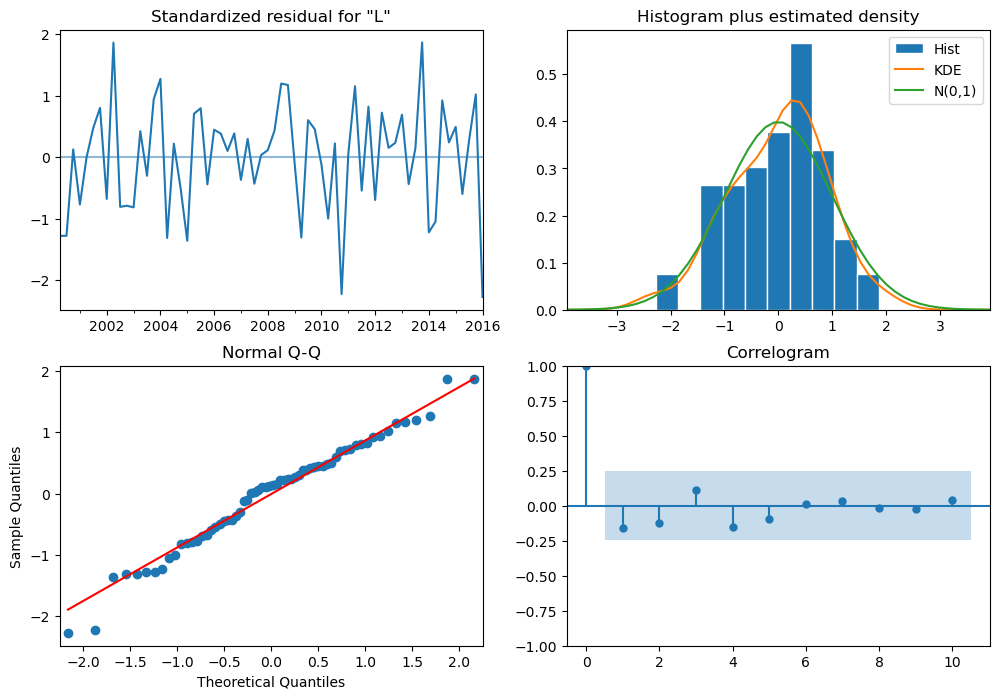

In [77]:
# Serial Correlation
fig = VA_ARIMA_mdl_fit_0.plot_diagnostics(figsize = (12,8))

In [78]:
ypred_0 = VA_ARIMA_mdl_fit_0.predict(start = VA_Econ_df.index[trn_idx], 
                                     end = VA_Econ_df.index[len(VA_Econ_df)-1])

In [79]:
ypred_0

2016-04-01     66127.210970
2016-07-01     83059.310064
2016-10-01    102265.314219
2017-01-01     86037.753010
2017-04-01     71444.878924
2017-07-01     88244.374243
2017-10-01    107998.271727
2018-01-01     90770.063920
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [80]:
# mean absolute percentage error, or mean_absolute_percentage_error from sklearn
np.mean(np.abs((ypred_0/ VA_Econ_df.Loans[trn_idx:]-1))) * 100  #7.02% not bad

7.028868441267526

In [81]:
ytrue =VA_Econ_df.Loans[trn_idx:]

In [82]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
mean_absolute_percentage_error(ytrue, ypred_0)

0.07028868441267525

In [83]:
mean_squared_error(ytrue, ypred_0, squared = False) #rmse

7170.086059326173

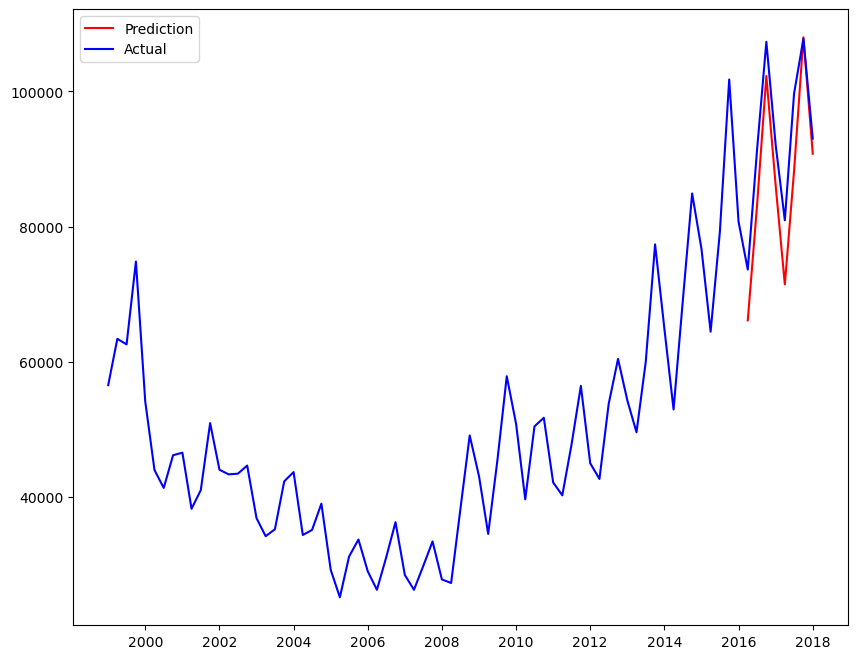

In [84]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(ypred_0, 'r-', label="Prediction")
ax.plot(VA_Econ_df['Loans'], 'b-', label="Actual")
ax.legend(loc="best")

## AR1 models with Exog (X) variables
* https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

In [85]:
VA_Econ_df.columns

Index(['Loans', 'rGDP', 'nGDP', 'rDPI', 'nDPI', 'UR', 'CPI', 'TR3M', 'TR5Y',
       'TR10Y', 'BBBCY', 'MR30Y', 'PR', 'DJTSMI', 'HPI', 'CREP', 'VIX',
       'Loan_diff', 'Loan_logdiff', 'MR_diff', 'UR_diff', 'TR5YR_diff',
       'TR10YR_diff', 'BBB_diff', 'HPI_diff', 'MR_pct', 'HPI_pct', 'DJTSM_pct',
       'UR_pct', 'UR_diff_lag1', 'MR_diff_lag1', 'HPI_pct_lag1', 'MR_pct_lag1',
       'UR_pct_lag1', 'UR_diff_lag2', 'MR_diff_lag2', 'HPI_pct_lag2',
       'MR_pct_lag2', 'UR_pct_lag2', 'Dummy1'],
      dtype='object')

In [86]:
corr_loan = VA_Econ_df.iloc[:trn_idx,1:-1].corr().iloc[1:, 0]

In [87]:
corr_loan.sort_values(ascending = False)

nGDP            0.947182
HPI_pct_lag2    0.517689
HPI_pct_lag1    0.508623
HPI_pct         0.485439
HPI_diff        0.463792
DJTSM_pct       0.444730
TR5YR_diff      0.373780
CPI             0.306761
MR_diff         0.263154
TR10YR_diff     0.241860
nDPI            0.235587
MR_diff_lag1    0.233459
MR_pct          0.213552
TR5Y            0.202885
MR_pct_lag1     0.184244
TR10Y           0.163929
TR3M            0.159001
DJTSMI          0.141929
PR              0.116106
rDPI            0.111093
MR30Y           0.094966
Loan_diff      -0.034786
HPI            -0.044578
MR_diff_lag2   -0.055241
Loan_logdiff   -0.061521
MR_pct_lag2    -0.082620
UR             -0.156605
UR_diff_lag2   -0.185975
BBB_diff       -0.191480
BBBCY          -0.249261
UR_pct_lag2    -0.263983
CREP           -0.268226
UR_diff_lag1   -0.367939
UR_pct_lag1    -0.388322
UR_diff        -0.560106
VIX            -0.576349
UR_pct         -0.602864
Name: rGDP, dtype: float64

In [88]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [89]:
#vs: variable selection 
VA_ARIMA_vs = ['DJTSMI']  

# fit model allow exogenouse data
VA_ARIMA_mdl = sm.tsa.SARIMAX(VA_Econ_df['Loans'][:trn_idx], 
                              exog = VA_Econ_df.loc[VA_Econ_df.index[:trn_idx], 
                                                    VA_ARIMA_vs], 
                              order=(1, 1, 1), 
                              seasonal_order=(1,1,1,4),
                              freq="QS")  

VA_ARIMA_mdl_fit = VA_ARIMA_mdl.fit()
VA_ARIMA_mdl_fit.summary()

# sigma2: estimate of the variance of the error term

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.31340D+00    |proj g|=  5.55980D-01

At iterate    5    f=  9.18788D+00    |proj g|=  1.51781D-02

At iterate   10    f=  9.17622D+00    |proj g|=  1.37198D-01

At iterate   15    f=  9.16489D+00    |proj g|=  3.79273D-02

At iterate   20    f=  9.14717D+00    |proj g|=  2.00572D-02

At iterate   25    f=  9.14383D+00    |proj g|=  1.35805D-02

At iterate   30    f=  9.14327D+00    |proj g|=  2.14871D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/dada/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Loans   No. Observations:                   69
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -630.886
Date:                           Sat, 11 Nov 2023   AIC                           1273.771
Time:                                   17:50:57   BIC                           1286.724
Sample:                               01-01-1999   HQIC                          1278.874
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DJTSMI         0.5831      0.769      0.758      0.448      -0.924       2.091
ar.L1         -0.7188      0.106     -6.773      0.000      -0.927      -0.511
ma.L1          0.9545      0.132      7.228      0.000       0.696       1.213
ar.S.L4       -0.2115      0.259     -0.818      0.413      -0.718       0.295
ma.S.L4       -0.1340      0.328     -0.408      0.683      -0.777       0.509
sigma2      2.744e+07   5.93e-09   4.63e+15      0.000    2.74e+07    2.74e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.25   Prob(JB):                         0.60
Heteroskedasticity (H):               0.98   Skew:                            -0.30
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.9e+31. Standard errors may be unstable.
"""

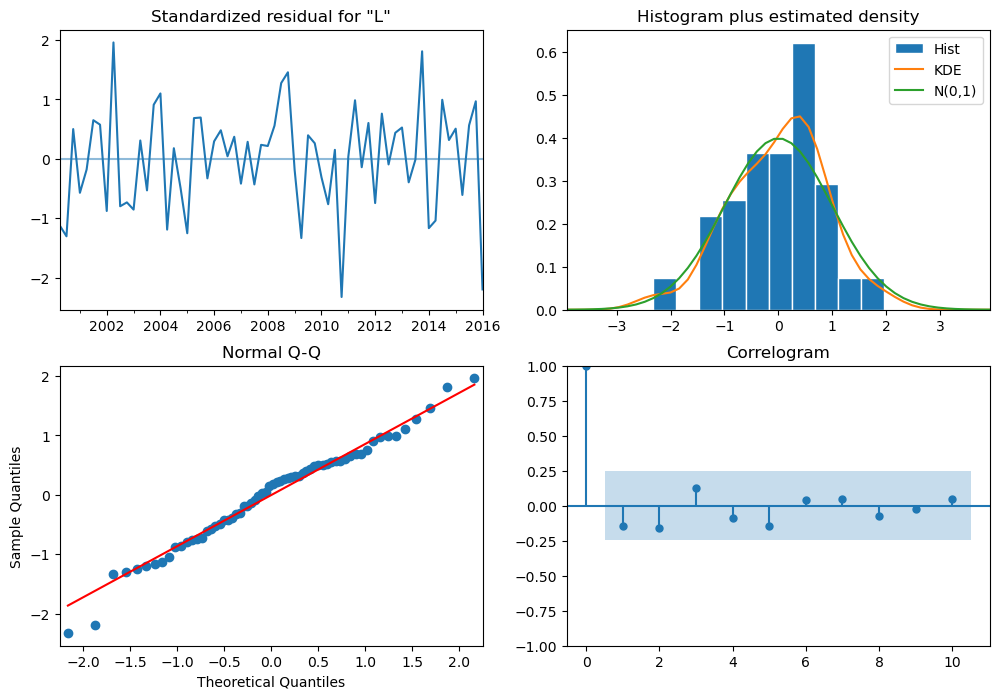

In [90]:
# Serial Correlation
fig = VA_ARIMA_mdl_fit.plot_diagnostics(figsize = (12,8))

## Test on data beyond training window

In [228]:
ypred = VA_ARIMA_mdl_fit.predict(start = VA_Econ_df.index[trn_idx], 
                                 end = VA_Econ_df.index[len(VA_Econ_df)-1], 
                                 exog = VA_Econ_df.loc[VA_Econ_df.index.isin(VA_Econ_df.index[trn_idx:]), 
                                                          VA_ARIMA_vs])

In [229]:
ytrue = VA_Econ_df.Loans[trn_idx:]

In [230]:
# mean absolute percentage error
np.mean(np.abs(ypred / ytrue-1)) * 100  #5.96% 

5.960140717358129

In [231]:
#use mean_absolute_percentage_error function from sklearn
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytrue, ypred) # you have to put ytrue first and then ypred at 2nd position

0.05960140717358131

In [232]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [233]:
mean_absolute_percentage_error(ytrue, ypred) #5.96%

5.960140717358131

In [234]:
mean_squared_error(ytrue, ypred, squared = False) #7170

5750.290339239849

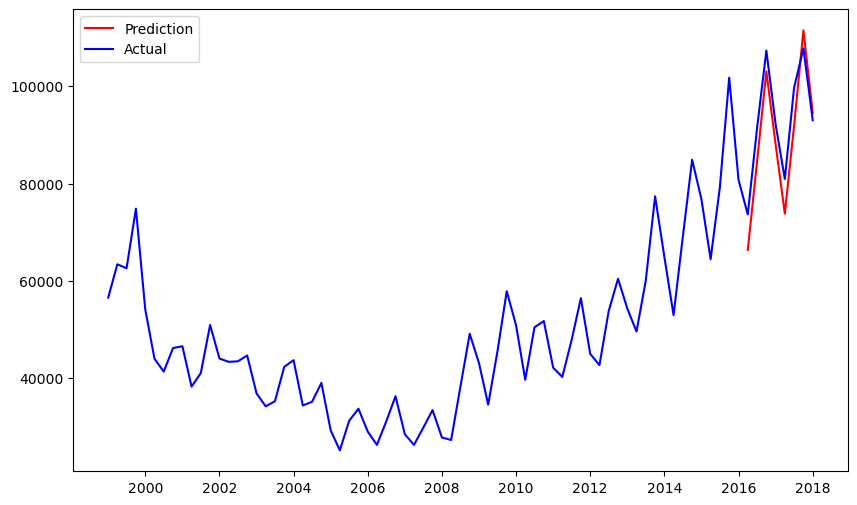

In [235]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ypred, 'r-', label="Prediction")
ax.plot(VA_Econ_df['Loans'], 'b-', label="Actual")
ax.legend(loc="best")

# PART 2 Other TS modeling methods

* Prophet - developed by Meta AI team @ https://www.kaggle.com/code/manovirat/timeseries-using-prophet-hyperparameter-tuning @ https://facebook.github.io/prophet/
* DL neural network: N-Beats  #darts @https://unit8co.github.io/darts/generated_api/darts.models.forecasting.nbeats.html

In [99]:
try:
    import prophet #univarite ML/non-parametric modeling approach
except:
    !pip install prophet

In [100]:
import prophet
prophet.__version__

'1.1.5'

In [101]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from prophet import Prophet

In [102]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot

In [103]:
VA_Econ_df.head()

Loans  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  BBBCY  \
Quarters                                                                        
1999-01-01  56542   3.8   5.4   3.7   4.7  4.3  1.5   4.4   5.0    5.4    6.8   
1999-04-01  63390   3.1   4.6   0.9   3.1  4.3  3.0   4.5   5.5    5.8    7.2   
1999-07-01  62575   5.3   6.8   2.8   5.0  4.2  3.0   4.7   5.9    6.2    7.7   
1999-10-01  74827   7.0   9.3   6.1   8.7  4.1  3.0   5.0   6.1    6.5    7.9   
2000-01-01  54115   1.5   4.2   7.9  11.5  4.0  4.0   5.5   6.6    6.7    8.2   

            MR30Y   PR   DJTSMI    HPI   CREP   VIX  Loan_diff  Loan_logdiff  \
Quarters                                                                       
1999-01-01    6.9  7.8  11707.7   93.9  124.3  33.0        NaN           NaN   
1999-04-01    7.2  7.8  12583.6   95.8  121.8  28.9     6848.0      0.114322   
1999-07-01    7.8  8.1  11713.8   97.7  126.6  28.5     -815.0     -0.012940   
1999-10-01    7.8  8.4  13812.7   99.8  129.5  28.8    12252.0      0.178813   
2000-01-01    8.3  8.7  14296.2  102.3  126.4  27.0   -20712.0     -0.324067   

            MR_diff  UR_diff  TR5YR_diff  TR10YR_diff  BBB_diff  HPI_diff  \
Quarters                                                                    
1999-01-01      NaN      NaN         NaN          NaN       NaN       NaN   
1999-04-01      0.3      0.0         0.5          0.4       0.4       1.9   
1999-07-01      0.6     -0.1         0.4          0.4       0.5       1.9   
1999-10-01      0.0     -0.1         0.2          0.3       0.2       2.1   
2000-01-01      0.5     -0.1         0.5          0.2       0.3       2.5   

              MR_pct   HPI_pct  DJTSM_pct    UR_pct  UR_diff_lag1  \
Quarters                                                            
1999-01-01       NaN       NaN        NaN       NaN           NaN   
1999-04-01  4.347826  2.023429   7.481401  0.000000           NaN   
1999-07-01  8.333333  1.983299  -6.912171 -2.325581           0.0   
1999-10-01  0.000000  2.149437  17.918182 -2.380952          -0.1   
2000-01-01  6.410256  2.505010   3.500402 -2.439024          -0.1   

            MR_diff_lag1  HPI_pct_lag1  MR_pct_lag1  UR_pct_lag1  \
Quarters                                                           
1999-01-01           NaN           NaN          NaN          NaN   
1999-04-01           NaN           NaN          NaN          NaN   
1999-07-01           0.3      2.023429     4.347826     0.000000   
1999-10-01           0.6      1.983299     8.333333    -2.325581   
2000-01-01           0.0      2.149437     0.000000    -2.380952   

            UR_diff_lag2  MR_diff_lag2  HPI_pct_lag2  MR_pct_lag2  \
Quarters                                                            
1999-01-01           NaN           NaN           NaN          NaN   
1999-04-01           NaN           NaN           NaN          NaN   
1999-07-01           NaN           NaN           NaN          NaN   
1999-10-01           0.0           0.3      2.023429     4.347826   
2000-01-01          -0.1           0.6      1.983299     8.333333   

            UR_pct_lag2  Dummy1  
Quarters                         
1999-01-01          NaN       0  
1999-04-01          NaN       0  
1999-07-01          NaN       0  
1999-10-01     0.000000       0  
2000-01-01    -2.325581       0

In [104]:
VA_Econ_df.index.name = "ds"
VA_Econ_prophet = VA_Econ_df.reset_index()

In [105]:
VA_Econ_prophet.rename(columns={'Loans': 'y'}, inplace=True)
VA_Econ_prophet.head()

ds      y  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  \
0 1999-01-01  56542   3.8   5.4   3.7   4.7  4.3  1.5   4.4   5.0    5.4   
1 1999-04-01  63390   3.1   4.6   0.9   3.1  4.3  3.0   4.5   5.5    5.8   
2 1999-07-01  62575   5.3   6.8   2.8   5.0  4.2  3.0   4.7   5.9    6.2   
3 1999-10-01  74827   7.0   9.3   6.1   8.7  4.1  3.0   5.0   6.1    6.5   
4 2000-01-01  54115   1.5   4.2   7.9  11.5  4.0  4.0   5.5   6.6    6.7   

   BBBCY  MR30Y   PR   DJTSMI    HPI   CREP   VIX  Loan_diff  Loan_logdiff  \
0    6.8    6.9  7.8  11707.7   93.9  124.3  33.0        NaN           NaN   
1    7.2    7.2  7.8  12583.6   95.8  121.8  28.9     6848.0      0.114322   
2    7.7    7.8  8.1  11713.8   97.7  126.6  28.5     -815.0     -0.012940   
3    7.9    7.8  8.4  13812.7   99.8  129.5  28.8    12252.0      0.178813   
4    8.2    8.3  8.7  14296.2  102.3  126.4  27.0   -20712.0     -0.324067   

   MR_diff  UR_diff  TR5YR_diff  TR10YR_diff  BBB_diff  HPI_diff    MR_pct  \
0      NaN      NaN         NaN          NaN       NaN       NaN       NaN   
1      0.3      0.0         0.5          0.4       0.4       1.9  4.347826   
2      0.6     -0.1         0.4          0.4       0.5       1.9  8.333333   
3      0.0     -0.1         0.2          0.3       0.2       2.1  0.000000   
4      0.5     -0.1         0.5          0.2       0.3       2.5  6.410256   

    HPI_pct  DJTSM_pct    UR_pct  UR_diff_lag1  MR_diff_lag1  HPI_pct_lag1  \
0       NaN        NaN       NaN           NaN           NaN           NaN   
1  2.023429   7.481401  0.000000           NaN           NaN           NaN   
2  1.983299  -6.912171 -2.325581           0.0           0.3      2.023429   
3  2.149437  17.918182 -2.380952          -0.1           0.6      1.983299   
4  2.505010   3.500402 -2.439024          -0.1           0.0      2.149437   

   MR_pct_lag1  UR_pct_lag1  UR_diff_lag2  MR_diff_lag2  HPI_pct_lag2  \
0          NaN          NaN           NaN           NaN           NaN   
1          NaN          NaN           NaN           NaN           NaN   
2     4.347826     0.000000           NaN           NaN           NaN   
3     8.333333    -2.325581           0.0           0.3      2.023429   
4     0.000000    -2.380952          -0.1           0.6      1.983299   

   MR_pct_lag2  UR_pct_lag2  Dummy1  
0          NaN          NaN       0  
1          NaN          NaN       0  
2          NaN          NaN       0  
3     4.347826     0.000000       0  
4     8.333333    -2.325581       0

In [106]:
train_data = VA_Econ_prophet[['ds', 'y']].iloc[:trn_idx]
validation_data = VA_Econ_prophet[['ds', 'y']].drop(train_data.index)

print(f'training data size : {train_data.shape}')
print(f'validation data size : {validation_data.shape}')

train_data = train_data.reset_index()
validation_data = validation_data.reset_index()

training data size : (69, 2)
validation data size : (8, 2)


In [107]:
validation_data

index         ds       y
0     69 2016-04-01   73637
1     70 2016-07-01   91283
2     71 2016-10-01  107331
3     72 2017-01-01   92047
4     73 2017-04-01   80925
5     74 2017-07-01   99671
6     75 2017-10-01  107791
7     76 2018-01-01   93006

In [108]:
model = Prophet() #everything is default
model.fit(train_data)

17:51:50 - cmdstanpy - INFO - Chain [1] start processing
17:51:51 - cmdstanpy - INFO - Chain [1] done processing


In [113]:
validation_data.shape

(8, 3)

In [109]:
prediction = model.predict(pd.DataFrame({'ds':validation_data['ds']}))
y_actual = validation_data['y']
y_predicted = prediction['yhat']

In [110]:
prediction

ds         trend    yhat_lower     yhat_upper   trend_lower  \
0 2016-04-01   6722.632448  62857.871329   76689.977686   6696.395866   
1 2016-07-01   8148.782749  70252.430488   83615.778949   8044.725385   
2 2016-10-01   9590.605032  78942.835758   91984.965890   9364.822856   
3 2017-01-01  11032.427315  74749.515688   87642.876227  10647.694103   
4 2017-04-01  12442.905636  69846.011723   83131.723543  11886.970451   
5 2017-07-01  13869.055937  77498.915088   91338.903847  13130.807734   
6 2017-10-01  15310.878220  87023.018522  100083.802617  14357.291075   
7 2018-01-01  16752.700503  80699.366898   94790.342582  15643.452363   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   6759.618433    63189.901026          63189.901026          63189.901026   
1   8276.460297    68785.254713          68785.254713          68785.254713   
2   9878.499631    76064.264193          76064.264193          76064.264193   
3  11497.574760    70202.325259          70202.325259          70202.325259   
4  13106.294396    63997.313836          63997.313836          63997.313836   
5  14755.404413    70623.142577          70623.142577          70623.142577   
6  16422.577128    78171.499031          78171.499031          78171.499031   
7  18071.432491    70900.562452          70900.562452          70900.562452   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  63189.901026  63189.901026  63189.901026                   0.0   
1  68785.254713  68785.254713  68785.254713                   0.0   
2  76064.264193  76064.264193  76064.264193                   0.0   
3  70202.325259  70202.325259  70202.325259                   0.0   
4  63997.313836  63997.313836  63997.313836                   0.0   
5  70623.142577  70623.142577  70623.142577                   0.0   
6  78171.499031  78171.499031  78171.499031                   0.0   
7  70900.562452  70900.562452  70900.562452                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  69912.533474  
1                         0.0                         0.0  76934.037462  
2                         0.0                         0.0  85654.869225  
3                         0.0                         0.0  81234.752575  
4                         0.0                         0.0  76440.219471  
5                         0.0                         0.0  84492.198515  
6                         0.0                         0.0  93482.377251  
7                         0.0                         0.0  87653.262955

In [114]:
# mean absolute percentage error
mean_absolute_percentage_error(y_actual, y_predicted) * 100 #11.5% 

11.56494857664303

# After finetuning on hyperparameters, the MAPE can be further reduced to 4.23% See Appendix

In [108]:
mean_squared_error(y_actual, y_predicted, squared = False)

12700.499336801331

#### make_future_dataframe() create a quarterly TS with the last date of a quarter 
#### rather than the first date of a quarter. 

In [118]:
validation_data

index         ds       y
0     69 2016-04-01   73637
1     70 2016-07-01   91283
2     71 2016-10-01  107331
3     72 2017-01-01   92047
4     73 2017-04-01   80925
5     74 2017-07-01   99671
6     75 2017-10-01  107791
7     76 2018-01-01   93006

In [119]:
future = model.make_future_dataframe(periods=len(y_predicted), freq='Q')
future.ds[-8:] = validation_data.ds

In [120]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(len(y_predicted)+1)

ds          yhat    yhat_lower     yhat_upper
68 2016-01-01  76099.037541  68877.735793   82452.300472
69 2016-04-01  69912.533474  63068.643645   76877.143400
70 2016-07-01  76934.037462  69916.256915   83748.160922
71 2016-10-01  85654.869225  79012.173145   92126.531397
72 2017-01-01  81234.752575  74834.596031   87924.676593
73 2017-04-01  76440.219471  69831.046124   82990.391848
74 2017-07-01  84492.198515  77607.009293   90916.186407
75 2017-10-01  93482.377251  86165.643318  100322.129777
76 2018-01-01  87653.262955  80608.605161   94228.669821

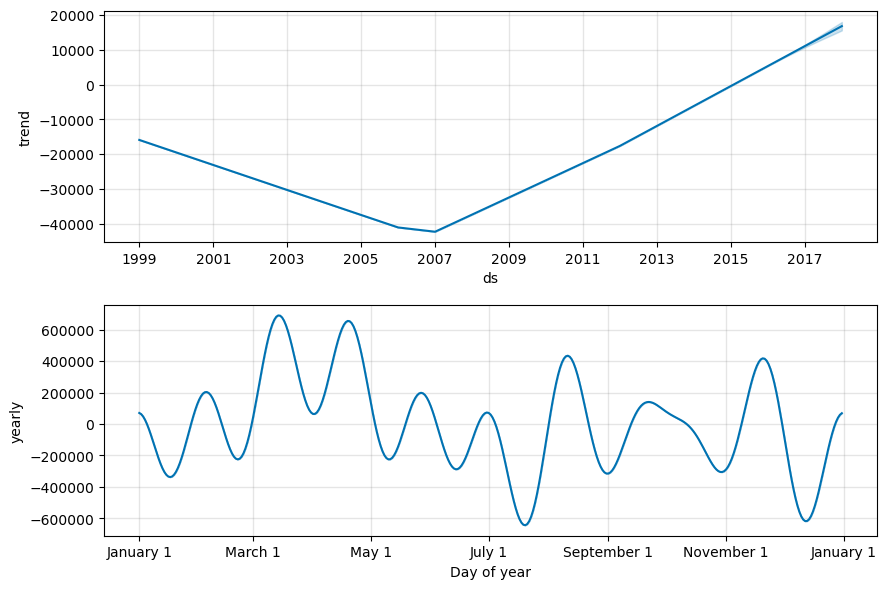

In [121]:
# Plot the components of the model
fig = model.plot_components(forecast)

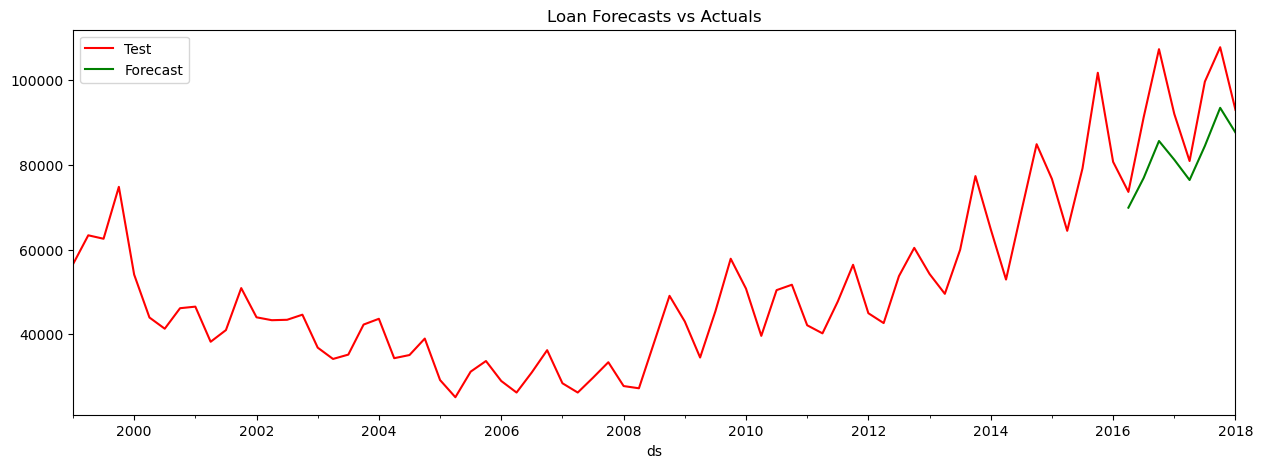

In [125]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
VA_Econ_prophet.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
forecast[-8:].plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Loan Forecasts vs Actuals')
plt.show()

## There are many other hyperparameters which helps in optimizing the prophet model.

* Holidays
* Changepoints: (n_changepoints,changepoint_prior_scale)
* seasonality_mode
* holiday_prior_scale
* Seasonalities with fourier_order
 

n_changepoints is the number of change happen in the data. Prophet model detects them by its own. By default, its value is 25, which are uniformly placed in the first 80% of the time series. Changing n_changepoints can add value to the model.

changepoint_prior_scale to indicate how flexible the changepoints are allowed to be. In other words, how much can the changepoints fit to the data. If you make it high it will be more flexible, but you can end up overfitting. By default, this parameter is set to 0.05

seasonality_mode There are 2 types model seasonality mode. Additive & multiplicaticative. By default Prophet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast. Prophet can model multiplicative seasonality by setting seasonality_mode='multiplicative' in the model.

holiday_prior_scale just like changepoint_prior_scale, holiday_prior_scale is used to smoothning the effect of holidays. By default its value is 10, which provides very little regularization. Reducing this parameter dampens holiday effects

Seasonalities with fourier_order Prophet model, by default finds the seasonalities and adds the default parameters of the seasonality. We can modify the seasonalities effect by adding custom seasonalities as add_seasonality in the model with different fourier order.Yy default Prophet uses a Fourier order of 3 for weekly seasonality and 10 for yearly seasonality.

Now, we will do the hyperparameters tuning using parametergrid. parametergrid will create all the possible parameters combination and will test the model prediction using every combination. I am taking 4 parameters: n_changepoints, changepoint_prior_scale,seasonality_mode, holiday_prior_scale for tuning.

# finetune 5 hyperparameters

In [126]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.01, 0.1,0.3,],
               'seasonality_prior_scale': [0.1, 1.0],
               'holidays_prior_scale':[0.1,0.3,0.5],
               'n_changepoints' : [100,150,200]}

grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 108


In [127]:
import random

In [188]:
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in tqdm(grid):
    
    test = pd.DataFrame()
    #print(p)
    random.seed(1234)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         seasonality_prior_scale = p['seasonality_prior_scale'],
                         #weekly_seasonality=True,
                         #daily_seasonality = True,
                         yearly_seasonality = True,
                         #holidays=holiday, 
                         interval_width=0.95)
    
    #train_model.add_country_holidays(country_name='US')
    train_model.fit(VA_Econ_prophet[["ds", "y"]][:trn_idx])
    
    train_forecast = train_model.make_future_dataframe(periods=validation_data.shape[0], 
                                                       freq='Q',include_history = False)
    
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    
    Actual = VA_Econ_prophet[["ds", "y"]][trn_idx:]
    MAPE = mean_absolute_percentage_error(Actual['y'], test['yhat'])
    
    #print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    
    model_parameters = pd.DataFrame({'MAPE':[MAPE],
                'changepoint_prior_scale': [p['changepoint_prior_scale']],
                'holidays_prior_scale': [p['holidays_prior_scale']],
                'n_changepoints': [p['n_changepoints']],
                'seasonality_mode': [p['seasonality_mode']],
                'seasonality_prior_scale': [p['seasonality_prior_scale']]})

  0%|                                                                                                                                                                                       | 0/108 [00:00<?, ?it/s]18:38:38 - cmdstanpy - INFO - Chain [1] start processing
18:38:38 - cmdstanpy - INFO - Chain [1] done processing
  1%|█▌                                                                                                                                                                             | 1/108 [00:00<00:33,  3.21it/s]18:38:38 - cmdstanpy - INFO - Chain [1] start processing
18:38:38 - cmdstanpy - INFO - Chain [1] done processing
  2%|███▏                                                                                                                                                                           | 2/108 [00:00<00:31,  3.39it/s]18:38:38 - cmdstanpy - INFO - Chain [1] start processing
18:38:38 - cmdstanpy - INFO - Chain [1] done processing
  3%|████▊               

In [189]:
model_parameters.MAPE.min() #5.96%

0.05237708275404611

In [190]:
best_model_para = model_parameters[model_parameters.MAPE == model_parameters.MAPE.min()]

In [191]:
best_model_para

MAPE  changepoint_prior_scale  holidays_prior_scale  n_changepoints  \
0  0.052377                      0.3                   0.5             200   

  seasonality_mode  seasonality_prior_scale  
0         additive                      1.0

In [218]:
train_model =Prophet(changepoint_prior_scale = best_model_para.changepoint_prior_scale[0],
                         holidays_prior_scale = best_model_para.holidays_prior_scale[0],
                         n_changepoints = best_model_para.n_changepoints[0],
                         seasonality_mode = best_model_para.seasonality_mode[0],
                         seasonality_prior_scale = best_model_para.seasonality_prior_scale[0],
                         #weekly_seasonality=True,
                         #daily_seasonality = True,
                         yearly_seasonality = True,
                         #holidays=holiday, 
                         interval_width=0.95)
    
#train_model.add_country_holidays(country_name='US')
train_model.fit(VA_Econ_prophet[["ds", "y"]][:trn_idx])

18:49:17 - cmdstanpy - INFO - Chain [1] start processing
18:49:18 - cmdstanpy - INFO - Chain [1] done processing


In [219]:
train_forecast = train_model.make_future_dataframe(periods=validation_data.shape[0], 
                                                       freq='Q',include_history = False)
    
train_forecast = train_model.predict(train_forecast)
test=train_forecast[['ds','yhat']]

In [223]:
test.ds = validation_data.ds

/tmp/ipykernel_246111/318324581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.ds = validation_data.ds


In [224]:
mean_absolute_percentage_error(VA_Econ_prophet.loc[trn_idx:, 'y'], test.yhat) * 100

5.237708275404611

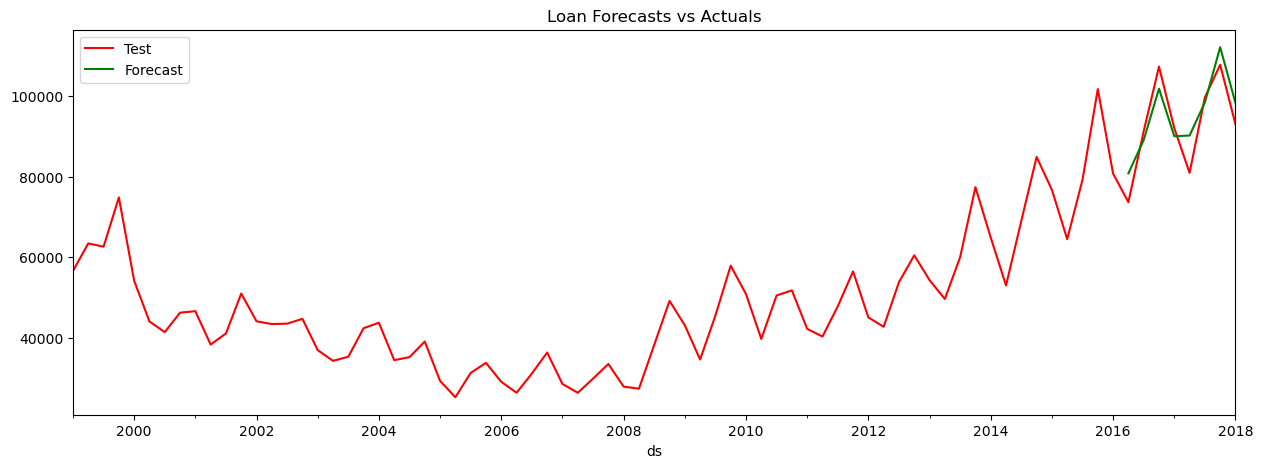

In [226]:
f, ax = plt.subplots(figsize=(12,6))
f.set_figheight(5)
f.set_figwidth(15)
VA_Econ_prophet.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
test.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Loan Forecasts vs Actuals')
plt.show()

In [237]:
#rmse
mean_squared_error(validation_data.y, test.yhat, squared = False) #5304 < 5750 ARIMAX with covariates

5304.043796918774

# Conclusion: after fine-tune, the univariate model by Prophet, outperform ARIMA model with DJ stock index covariates as the best model.  